## Lending Club Case Study 

#### Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import time 
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max.rows',None)

#### Reading the lending case study file

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
# checking the dimension of the dataset
df.shape

(39717, 111)

In [5]:
# printing top two rows of the dataset 
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#checking the column data types
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [7]:
# checking the missing percentage in the data set 
round((df.isnull().sum()/len(df))*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

#### Since there seem to be lot of Null values in many columns we will filter out columns having more than 100% NULL and create a new dataframe

In [8]:
# dropping the columns that are having 100 % missing 
# creating variable list that needs to be dropped 
columns_to_drop = df.columns[df.isnull().sum()/len(df)*100 == 100]
print(columns_to_drop)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [9]:
df1 = df.drop(columns = columns_to_drop)

In [10]:
# checking the dimension after dropping the variables
df1.shape

(39717, 57)

#### Checking if in dataset we have columns that has only one unique value 

In [11]:
single_value_col_list = [ i for i in df1.columns if df[i].nunique() == 1]

In [12]:
print(single_value_col_list)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [13]:
# dropping above columns as they have one unique value 
df2 = df1.drop(columns = single_value_col_list)

In [14]:
# checking the dimension after dropping the variables
df2.shape

(39717, 48)

#### checking if we have duplicate rows in dataset 

In [15]:
# checking if we have duplicate rows in dataset 
df2[df2.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

#### changing the column type  

In [17]:
df2['int_rate'] = df2['int_rate'].str[:-1].astype(float)
df2['int_rate'].dtype

dtype('float64')

In [18]:
df2['revol_util'] = df2['revol_util'].str[:-1].astype(float)
df2['revol_util'].dtype

dtype('float64')

In [19]:
df2['issue_d'] = pd.to_datetime(df2['issue_d'] , format = '%b-%y')
df2['issue_d'].dtype

dtype('<M8[ns]')

In [20]:
df2['earliest_cr_line'] = pd.to_datetime(df2['earliest_cr_line'] , format = '%b-%y')
df2['earliest_cr_line'].dtype

dtype('<M8[ns]')

In [21]:
df2['earliest_cr_line'] = pd.to_datetime(df2['earliest_cr_line'] , format = '%b-%y')
df2['earliest_cr_line'].dtype

dtype('<M8[ns]')

In [22]:
df2['next_pymnt_d'] = pd.to_datetime(df2['next_pymnt_d'] , format = '%b-%y')
df2['next_pymnt_d'].dtype

dtype('<M8[ns]')

In [23]:
df2['last_credit_pull_d'] = pd.to_datetime(df2['last_credit_pull_d'] , format = '%b-%y')
df2['last_credit_pull_d'].dtype

dtype('<M8[ns]')

In [24]:
df2['last_pymnt_d'] = pd.to_datetime(df2['last_pymnt_d'] , format = '%b-%y')
df2['last_pymnt_d'].dtype

dtype('<M8[ns]')

#### writing function to check unique values for categorical variable

In [25]:
def unique_value_category_variable(df):

    # get the list of columns which has dtype as Object
    obj_col = df.select_dtypes(include = ['object']).columns
    # get the number of unique values for each object columns
    unique_count = df[obj_col].nunique()
    # sort the counts in descending order
    sorted_unique_counts = unique_count.sort_values(ascending=False)
    return sorted_unique_counts

In [26]:
unique_value_category_variable(df2)

url                    39717
emp_title              28820
desc                   26526
title                  19615
zip_code                 823
addr_state                50
sub_grade                 35
purpose                   14
emp_length                11
grade                      7
home_ownership             5
verification_status        3
loan_status                3
term                       2
dtype: int64

In [27]:
# dropping columns having too many values  --> emp_title , desc ,url ,title,zip_code
drop_list = ['emp_title' , 'desc' ,'url' ,'title','zip_code']
df2.drop(columns = drop_list , inplace=True)

In [28]:
df2.shape

(39717, 43)

In [29]:
#dropping columns having more than 90% missing 
list_more_90per_missing = df2.columns[df2.isnull().sum()/len(df2)*100 >= 90]
print(list_more_90per_missing)

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [30]:
df2.drop(columns = list_more_90per_missing ,inplace = True)
df2.shape

(39717, 41)

#### Drop additional columns which are not needed further in analysis

In [31]:
drop_list = ['id','member_id','funded_amnt_inv','issue_d','revol_bal','out_prncp','out_prncp_inv',
             'total_pymnt_inv','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

In [32]:
df2.drop(columns= drop_list , inplace= True)

In [33]:
df2.shape

(39717, 28)

#### creating box plots for numeric variables 

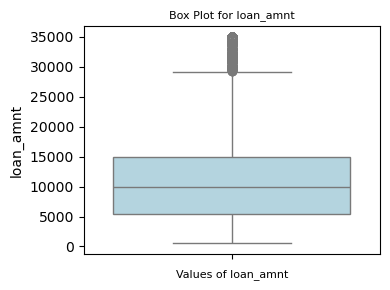

In [34]:
# Create a box plot for column 'loan_amnt'
plt.figure(figsize=(4, 3))
sns.boxplot(y=df2['loan_amnt'], color='lightblue')
plt.title('Box Plot for loan_amnt',fontsize=8)
plt.xlabel('Values of loan_amnt',fontsize=8)
plt.tight_layout()
plt.show()

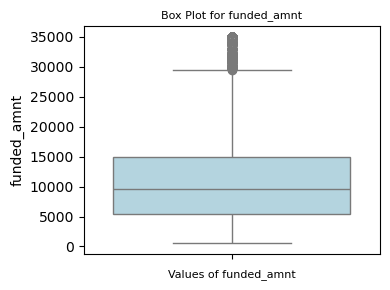

In [35]:
# Create a box plot for column 'funded_amnt'
plt.figure(figsize=(4, 3))
sns.boxplot(y=df2['funded_amnt'], color='lightblue')
plt.title('Box Plot for funded_amnt',fontsize=8)
plt.xlabel('Values of funded_amnt',fontsize=8)
plt.tight_layout()
plt.show()

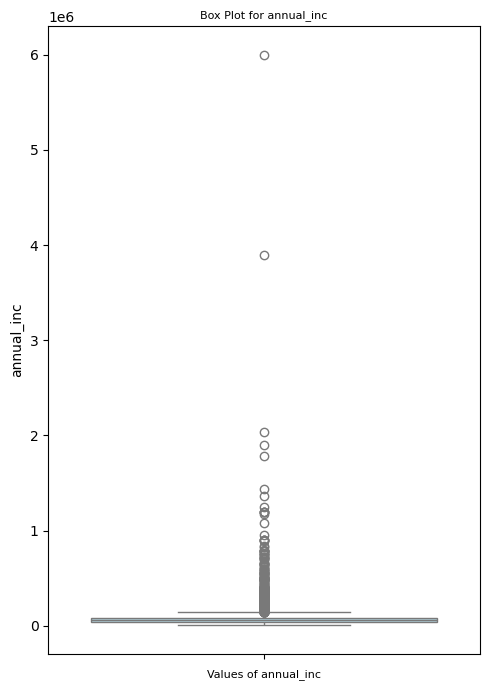

In [36]:
# Create a box plot for column 'annual_inc'
plt.figure(figsize=(5, 7))
sns.boxplot(y=df2['annual_inc'], color='lightblue')
plt.title('Box Plot for annual_inc',fontsize=8)
plt.xlabel('Values of annual_inc',fontsize=8)
plt.tight_layout()
plt.show()

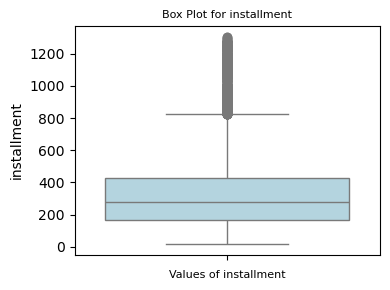

In [37]:
# Create a box plot for column 'installment'
plt.figure(figsize=(4, 3))
sns.boxplot(y=df2['installment'], color='lightblue')
plt.title('Box Plot for installment',fontsize=8)
plt.xlabel('Values of installment',fontsize=8)
plt.tight_layout()
plt.show()

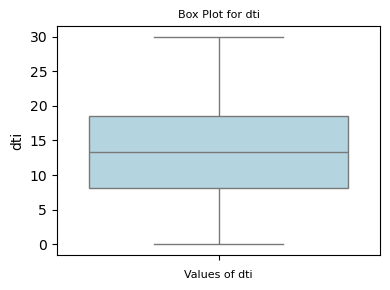

In [38]:

# Create a box plot for column 'dti'
plt.figure(figsize=(4, 3))
sns.boxplot(y=df2['dti'], color='lightblue')
plt.title('Box Plot for dti',fontsize=8)
plt.xlabel('Values of dti',fontsize=8)
plt.tight_layout()
plt.show()

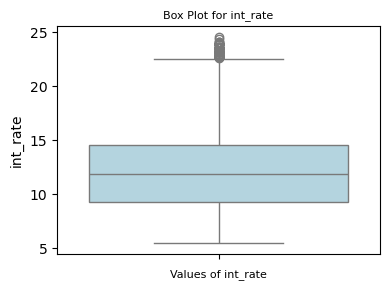

In [39]:
# Create a box plot for column 'int_rate'
plt.figure(figsize=(4, 3))
sns.boxplot(y=df2['int_rate'], color='lightblue')
plt.title('Box Plot for int_rate',fontsize=8)
plt.xlabel('Values of int_rate',fontsize=8)
plt.tight_layout()
plt.show()

In [40]:
df2[['int_rate','dti','installment','annual_inc','funded_amnt','loan_amnt']].quantile([.10,.25,.50,.75,.95,.99])

,int_rate,dti,installment,annual_inc,funded_amnt,loan_amnt
0.10,7.14,4.08,99.4500,30000.00,3200.0,3200.0
0.25,9.25,8.17,167.0200,40404.00,5400.0,5500.0
0.50,11.86,13.40,280.2200,59000.00,9600.0,10000.0
0.75,14.59,18.60,430.7800,82300.00,15000.0,15000.0
0.95,18.54,23.84,762.9960,142000.00,25000.0,25000.0
0.99,20.99,26.68,931.5416,234999.36,35000.0,35000.0


#### Key observations

1. The annual income of most of the loan applicants is between 40,404 - 82,300 
2. The loan amount of most of the loan applicants is between 5,500 - 15,000
3. The funded amount by investor for most of the loan applicants is between 5,400 - 15,000 
4. The interest rate on the loan is between 9.25% - 14.59%
5. The monthly installment amount on the loan is between 167 - 430
6. The debt to income ration is between 8.17 - 18.60

#### Creating a binary loan_status variable, where "Charged Off" is assigned a value of 1 and all other statuses are assigned a value of 0.

In [41]:
df2['binary_loan_status'] = df2['loan_status'].apply(lambda x : 1 if x=="Charged Off" else 0)
df2['binary_loan_status_1'] = df2['loan_status'].apply(lambda x : "Charged Off" if x == "Charged Off" else "Fully Paid/Current")

In [42]:
df2['binary_loan_status'].value_counts()

binary_loan_status
0    34090
1     5627
Name: count, dtype: int64

In [43]:
df2['binary_loan_status_1'].value_counts()

binary_loan_status_1
Fully Paid/Current    34090
Charged Off            5627
Name: count, dtype: int64

In [44]:
## checking if the variable is created correct 
df2['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

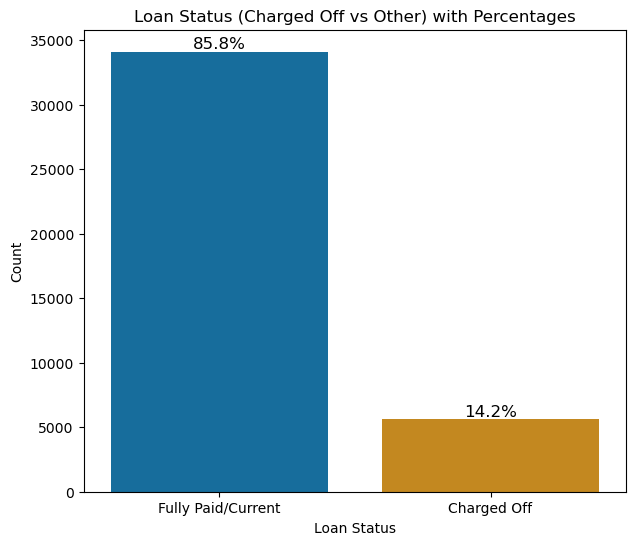

In [45]:
# Plot the bar chart
plt.figure(figsize=(7, 6))
ax = sns.countplot(x='binary_loan_status_1', data=df2, palette='colorblind')

# Calculate the total number of entries and percentages
total = len(df2)
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Loan Status (Charged Off vs Other) with Percentages')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Set x-ticks to show labels
# plt.xticks([0, 1], ['Fully Paid/Current', 'Fully Charged Off'], rotation=0)
plt.xticks( rotation=0)
# Show the plot
plt.show()

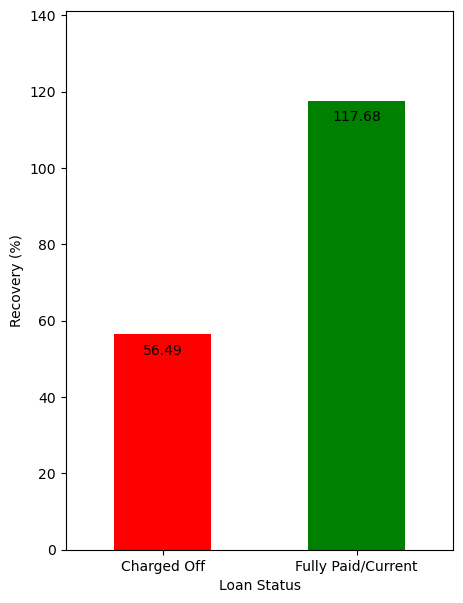

In [46]:
plt.figure(figsize=(5,7))
ax = (df2.groupby('binary_loan_status_1').total_pymnt.sum() * 100 / df2.groupby('binary_loan_status_1').loan_amnt.sum()).plot.bar(color=['red', 'green'])
ax.set_ylabel('Recovery (%)')
ax.set_xlabel('Loan Status')
plt.margins(0.2, 0.2)
plt.xticks(rotation=360)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Univariate Analysis

#### Categorical variables

1. Ordered categorical data
   1. Grade (grade)
   2. Sub grade (sub_grade)

2. Unordered categorical data
    1. Loan purpose (purpose)
    2. Home Ownership (home_ownership)

#### Let's analyse Ordered Categorical variable : Grade 

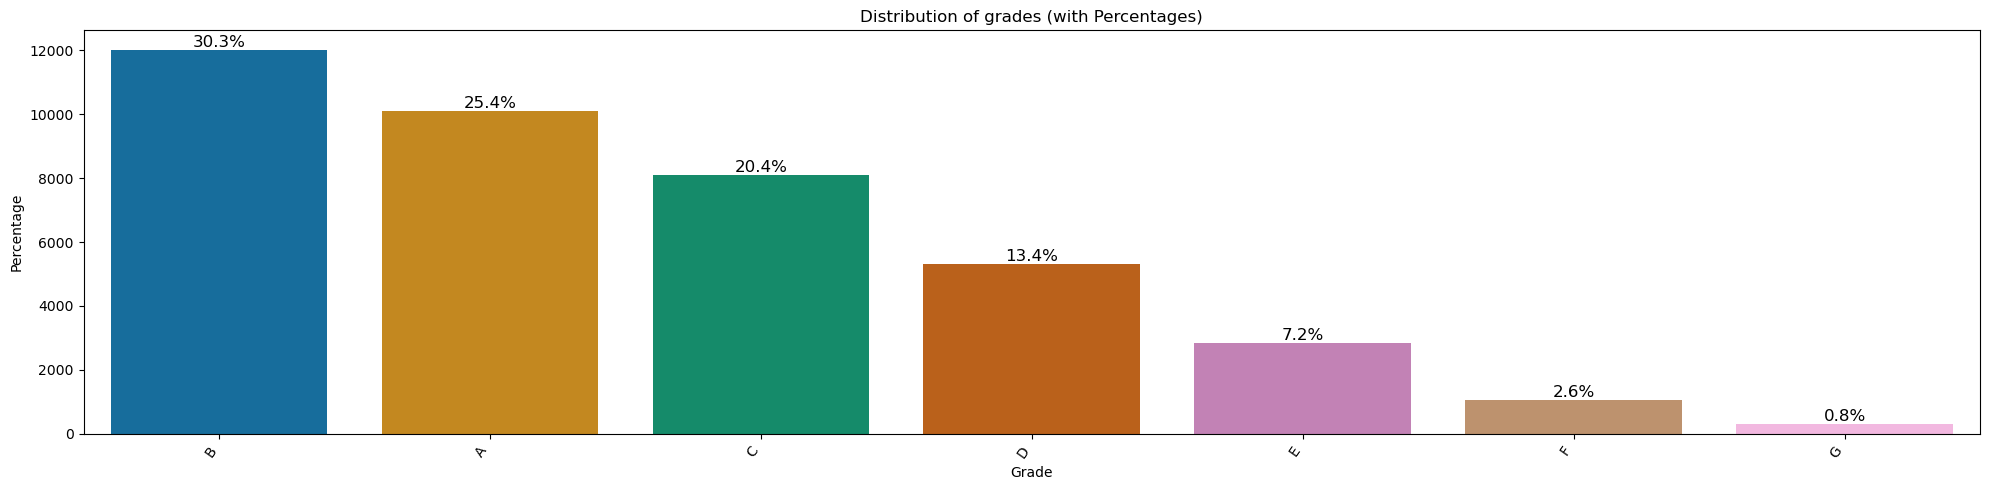

In [47]:
# plotting the distribution of purpose of grade 

# Count the values and sort them in descending order
sorted_purpose = df2['grade'].value_counts().index

# Plot the bar chart
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='grade', data=df2, palette='colorblind', order=sorted_purpose)

# Calculate the total number of entries and percentages
total = len(df2)
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Distribution of grades (with Percentages)')
plt.xlabel('Grade')
plt.ylabel('Percentage')

# Set x-ticks to show labels
plt.xticks(rotation=55, ha='right') 

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

In [48]:
# df2.groupby('binary_loan_status_1')['grade'].value_counts(normalize=True).reset_index(name = 'count')
# int_rates = pd.crosstab(df2['grade'],df2['binary_loan_status']).apply(lambda r: r/r.sum()*100, axis=0).reset_index()
# int_rates
pd.crosstab(df2['grade'],df2['binary_loan_status'], normalize=False)

binary_loan_status,0,1
grade,,
A,9483,602
B,10595,1425
C,6751,1347
D,4189,1118
E,2127,715
F,730,319
G,215,101


In [49]:
grade = pd.crosstab(df2['grade'],df2['binary_loan_status'], normalize=False).apply(lambda r: r/r.sum()*100, axis=0).reset_index()

binary_loan_status grade  Not Charged Off  Charged Off
0                      A        27.817542    10.698418
1                      B        31.079495    25.324329
2                      C        19.803461    23.938155
3                      D        12.288061    19.868491
4                      E         6.239366    12.706593
5                      F         2.141390     5.669095
6                      G         0.630683     1.794917


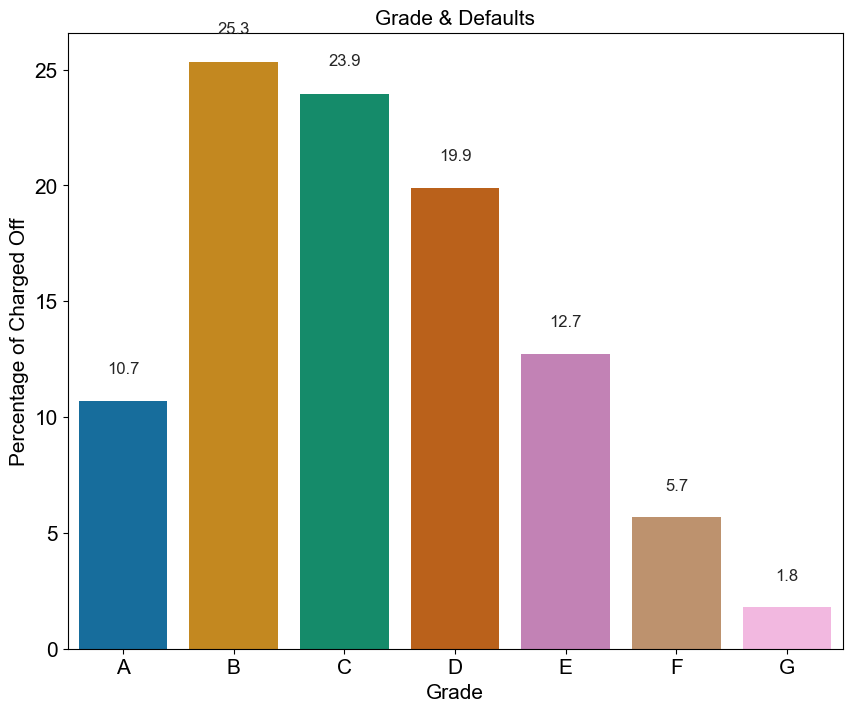

In [50]:
print(grade.head(10).rename(columns={0:'Not Charged Off', 1:"Charged Off"}))
plt.figure(figsize=(10,8))
splot = sns.barplot(x = 'grade',y=1, data = grade,palette='colorblind')

sns.set(font_scale=1)
splot.axes.set_title("Grade & Defaults",fontsize=15)
splot.set_xlabel("X Label",fontsize = 15)
splot.set_ylabel("Y Label",fontsize=15)
splot.tick_params(labelsize=15)

splot.set(xlabel='Grade', ylabel='Percentage of Charged Off')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()*1.005), ha = 'center', va = 'center', xytext = (0, 22), textcoords = 'offset points')


#### Let's analyse Ordered Categorical variable : Sub Grade

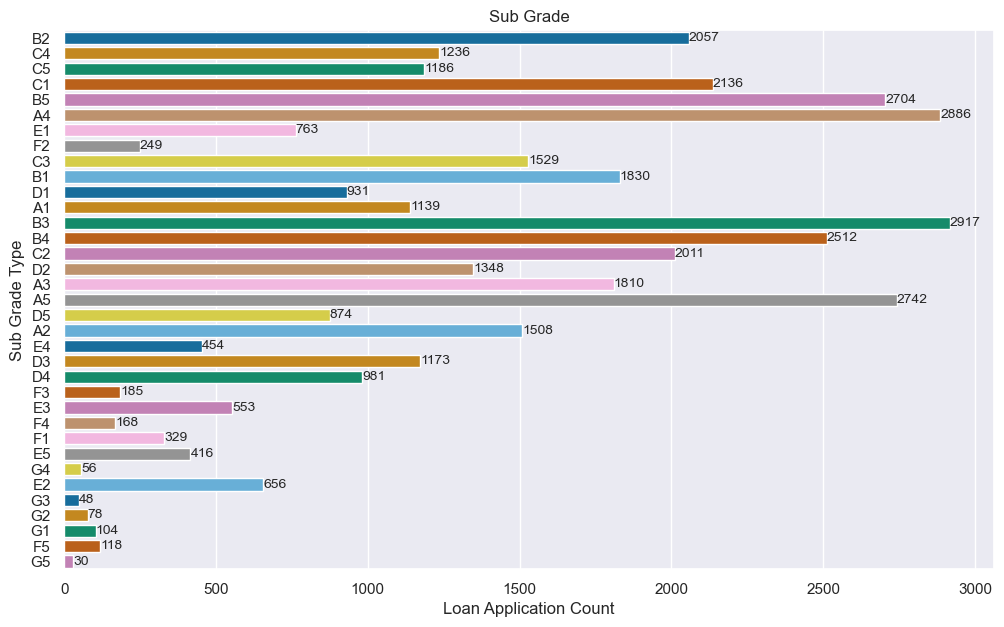

In [51]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(df2['sub_grade'], palette='colorblind')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title('Sub Grade')
plt.xlabel('Loan Application Count')
plt.ylabel('Sub Grade Type')
plt.show()

In [52]:
pd.crosstab(df2['grade'],df2['sub_grade'])

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,1139,1508,1810,2886,2742,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
B,0,0,0,0,0,1830,2057,2917,2512,2704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,2136,2011,1529,1236,1186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,931,1348,1173,981,874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,763,656,553,454,416,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,329,249,185,168,118,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,78,48,56,30


#### given sub grade is subcategory of grade hence no additional insight can be generated

#### Let's analyse unordered categorical variable : purpose of the loan

In [53]:
df2['purpose'].value_counts(normalize = True)*100

purpose
debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: proportion, dtype: float64

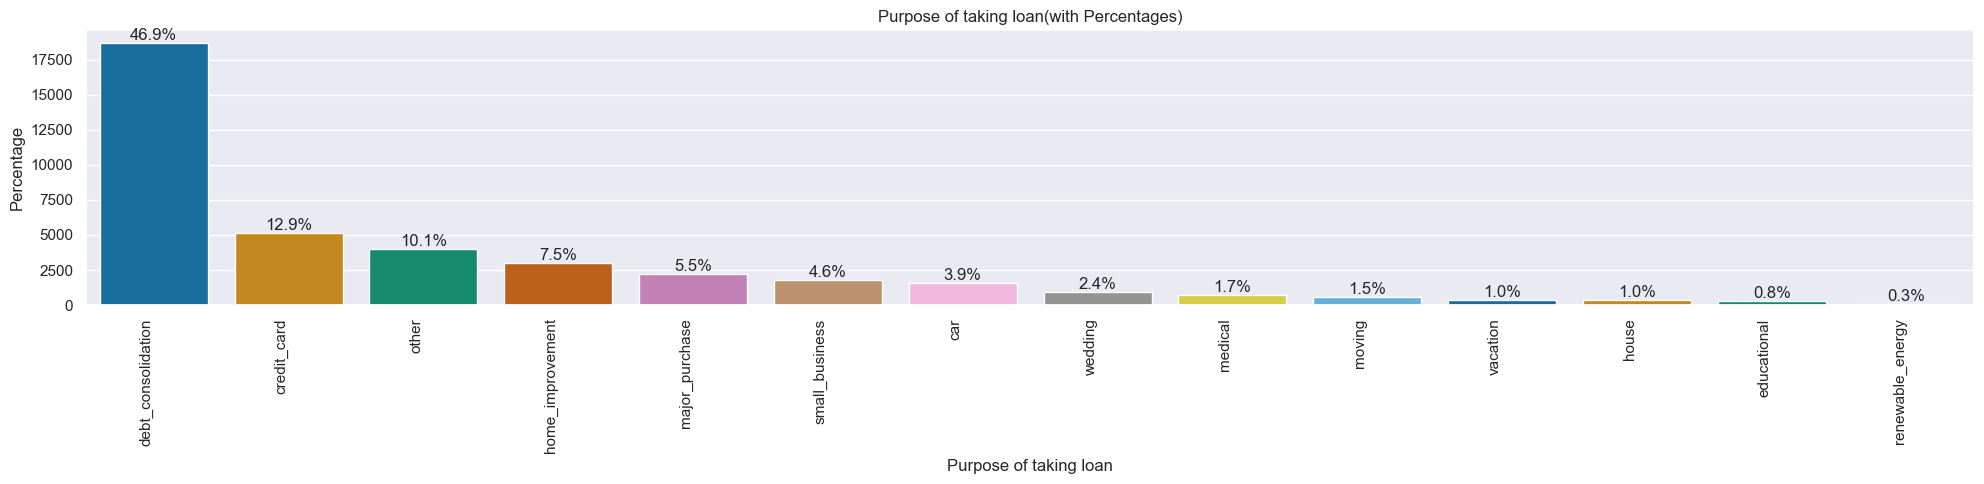

In [54]:
# plotting the distribution of purpose of loan 

# Count the values and sort them in descending order
sorted_purpose = df2['purpose'].value_counts().index

# Plot the bar chart
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='purpose', data=df2, palette='colorblind', order=sorted_purpose)

# Calculate the total number of entries and percentages
total = len(df2)
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Purpose of taking loan(with Percentages)')
plt.xlabel('Purpose of taking loan')
plt.ylabel('Percentage')

# Set x-ticks to show labels
plt.xticks(rotation=90, ha='right') 

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


### Let's analyse another unordered categorical variable : Home ownership

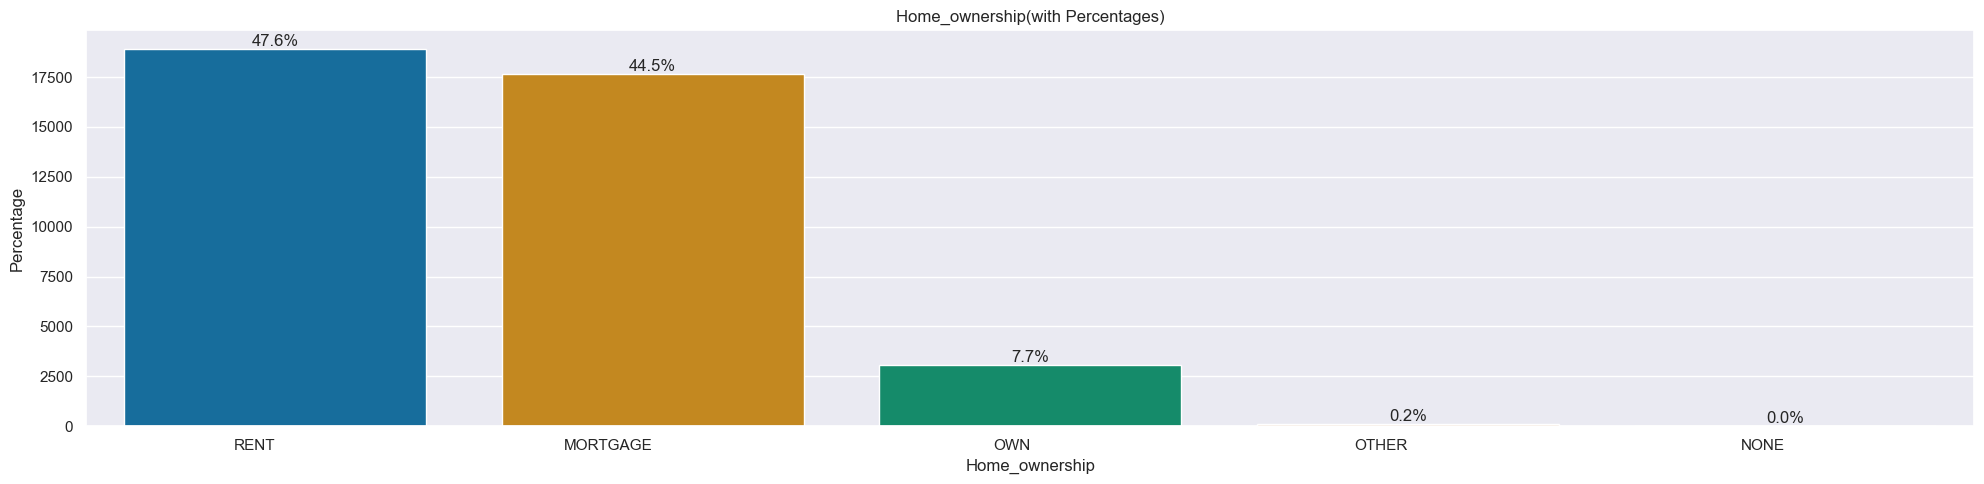

In [55]:
# plotting the distribution of purpose of loan 

# Count the values and sort them in descending order
sorted_purpose = df2['home_ownership'].value_counts().index

# Plot the bar chart
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='home_ownership', data=df2, palette='colorblind', order=sorted_purpose)

# Calculate the total number of entries and percentages
total = len(df2)
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Home_ownership(with Percentages)')
plt.xlabel('Home_ownership')
plt.ylabel('Percentage')

# Set x-ticks to show labels
plt.xticks(rotation=0, ha='right') 

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

In [56]:
pd.crosstab(df2['home_ownership'],df2['binary_loan_status'])

binary_loan_status,0,1
home_ownership,,
MORTGAGE,15332,2327
NONE,3,0
OTHER,80,18
OWN,2615,443
RENT,16060,2839


binary_loan_status home_ownership  Not Charged Off  Charged Off
0                        MORTGAGE        86.822583    13.177417
1                            NONE       100.000000     0.000000
2                           OTHER        81.632653    18.367347
3                             OWN        85.513407    14.486593
4                            RENT        84.978041    15.021959


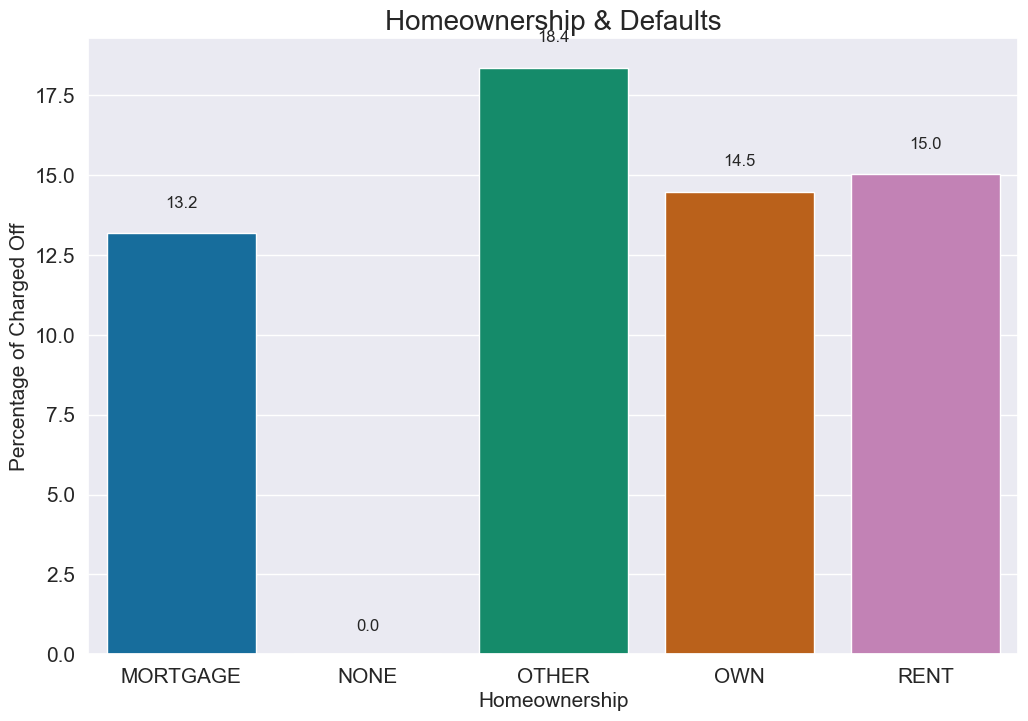

In [57]:
home_ownership = pd.crosstab(df2['home_ownership'],df2['binary_loan_status']).apply(lambda r: r/r.sum()*100, axis=1).reset_index()
print(home_ownership.head(10).rename(columns={0:'Not Charged Off', 1:"Charged Off"}))
plt.figure(figsize=(12,8))
splot = sns.barplot(x = 'home_ownership',y=1, data = home_ownership,palette='colorblind')

sns.set(font_scale=1)
splot.axes.set_title("Homeownership & Defaults",fontsize=20)
splot.set_xlabel("X Label",fontsize = 15)
splot.set_ylabel("Y Label",fontsize=15)
splot.tick_params(labelsize=15)

splot.set(xlabel='Homeownership', ylabel='Percentage of Charged Off')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()*1.005), ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')


## Bivariate Analysis

### Let's see at which rate interest rates are distributed and analyse it with other features

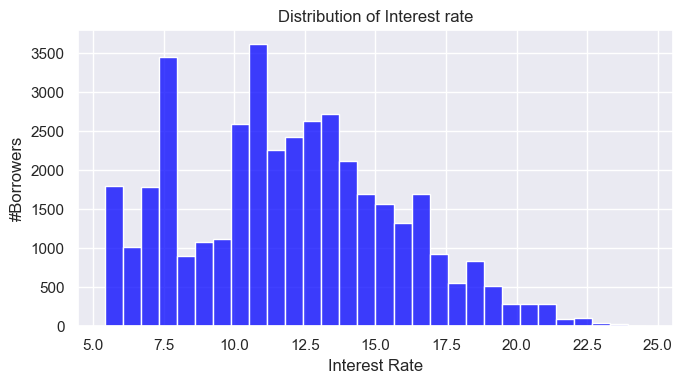

In [58]:
# Plot the histogram
plt.figure(figsize=(7, 4))
sns.histplot(df2['int_rate'], kde=False, color='blue', bins=30)  # Adjust 'bins' for granularity
plt.title('Distribution of Interest rate')
plt.xlabel('Interest Rate')
plt.ylabel('#Borrowers')
plt.tight_layout()
plt.show()

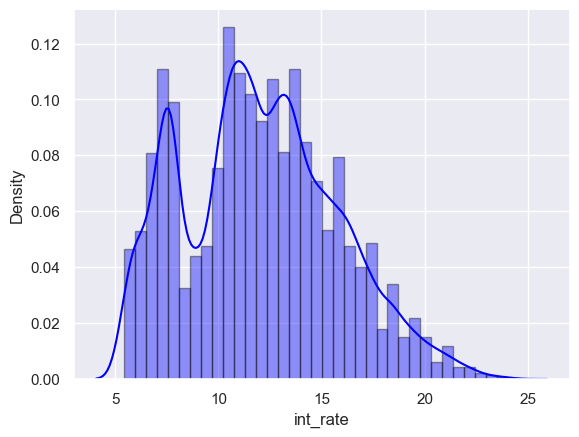

In [59]:
sns.distplot(df2['int_rate'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()


Text(0, 0.5, '# Borrowers')

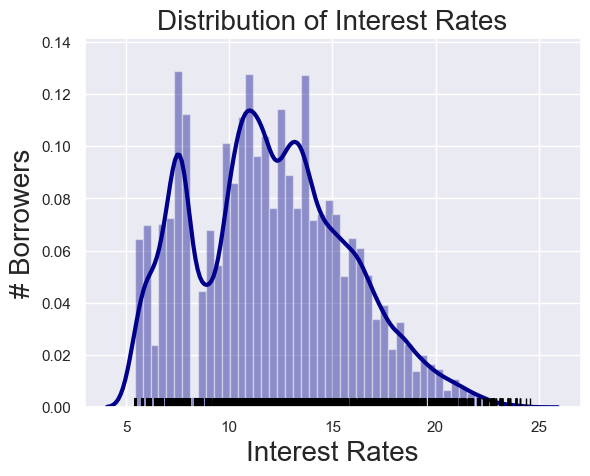

In [60]:
   
sns.distplot(df2['int_rate'], hist = True, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Distribution of Interest Rates',fontsize=20)
plt.xlabel('Interest Rates',fontsize=20)
plt.ylabel('# Borrowers',fontsize=20)

In [61]:
int_rate = df2.groupby([ 'purpose','binary_loan_status'])['int_rate'].median().reset_index()
print(int_rate)

               purpose  binary_loan_status  int_rate
0                  car                   0    10.250
1                  car                   1    11.710
2          credit_card                   0    11.260
3          credit_card                   1    13.350
4   debt_consolidation                   0    11.990
5   debt_consolidation                   1    14.170
6          educational                   0    11.490
7          educational                   1    12.530
8     home_improvement                   0    10.990
9     home_improvement                   1    13.110
10               house                   0    11.535
11               house                   1    15.270
12      major_purchase                   0    10.590
13      major_purchase                   1    13.110
14             medical                   0    10.990
15             medical                   1    13.360
16              moving                   0    11.120
17              moving                   1    

[Text(0.5, 0, 'Purpose'), Text(0, 0.5, 'Percentage')]

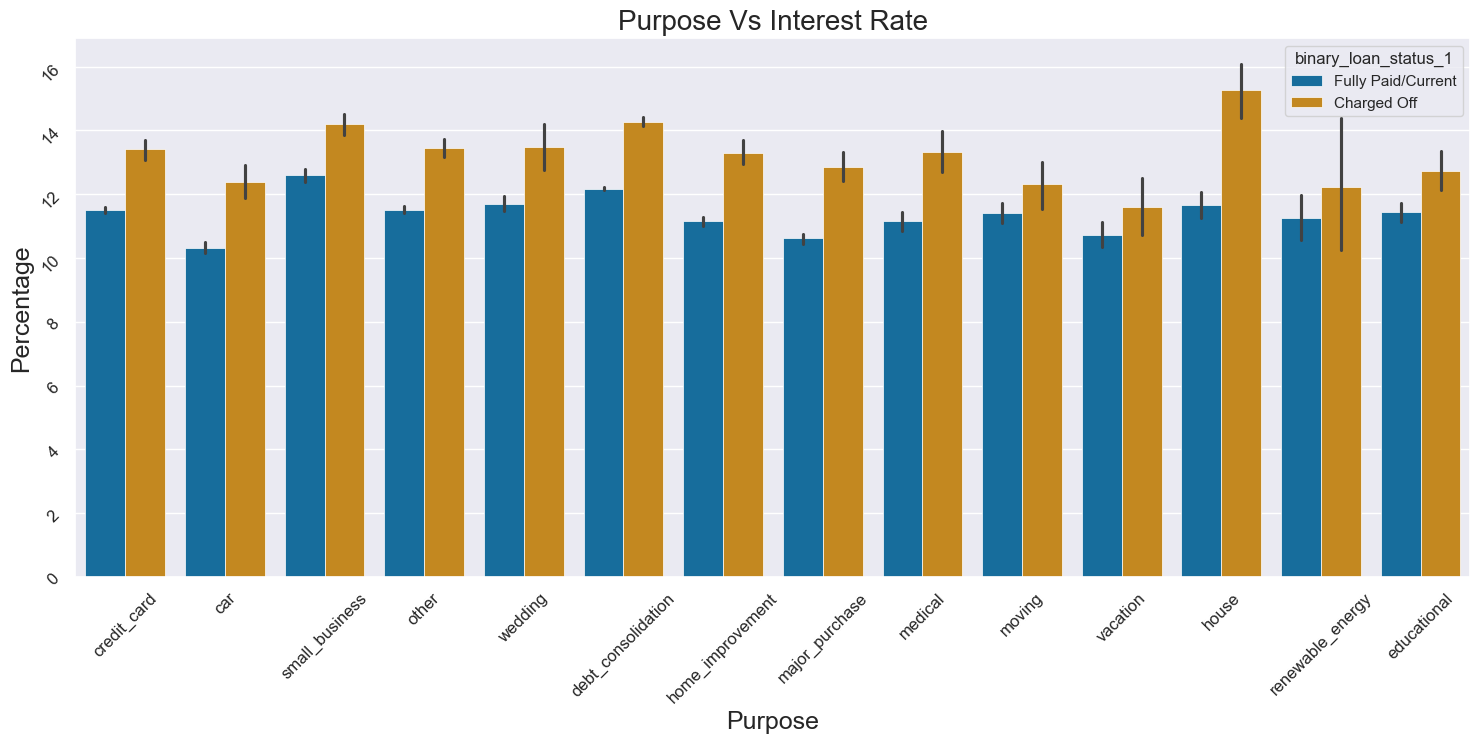

In [62]:
plt.figure(figsize=(18,7))
splot =sns.barplot(x= 'purpose',y='int_rate',hue = 'binary_loan_status_1',data= df2, palette='colorblind',linewidth = 0.5)

sns.set(font_scale=1)
splot.set_xlabel("X Label",fontsize=18)
splot.set_ylabel("Y Label",fontsize=18)
splot.tick_params(labelsize=12, rotation =45)
splot.set_title("Purpose Vs Interest Rate", fontsize=20)
splot.set(xlabel='Purpose', ylabel='Percentage')

binary_loan_status  int_rates  Not Charged Off  Charged Off
0                           5        95.864662     4.135338
1                           6        95.215119     4.784881
2                           7        93.940828     6.059172
3                           8        91.426991     8.573009
4                           9        90.663176     9.336824
5                          10        88.871042    11.128958
6                          11        86.305661    13.694339
7                          12        84.795830    15.204170
8                          13        84.088645    15.911355
9                          14        82.648236    17.351764


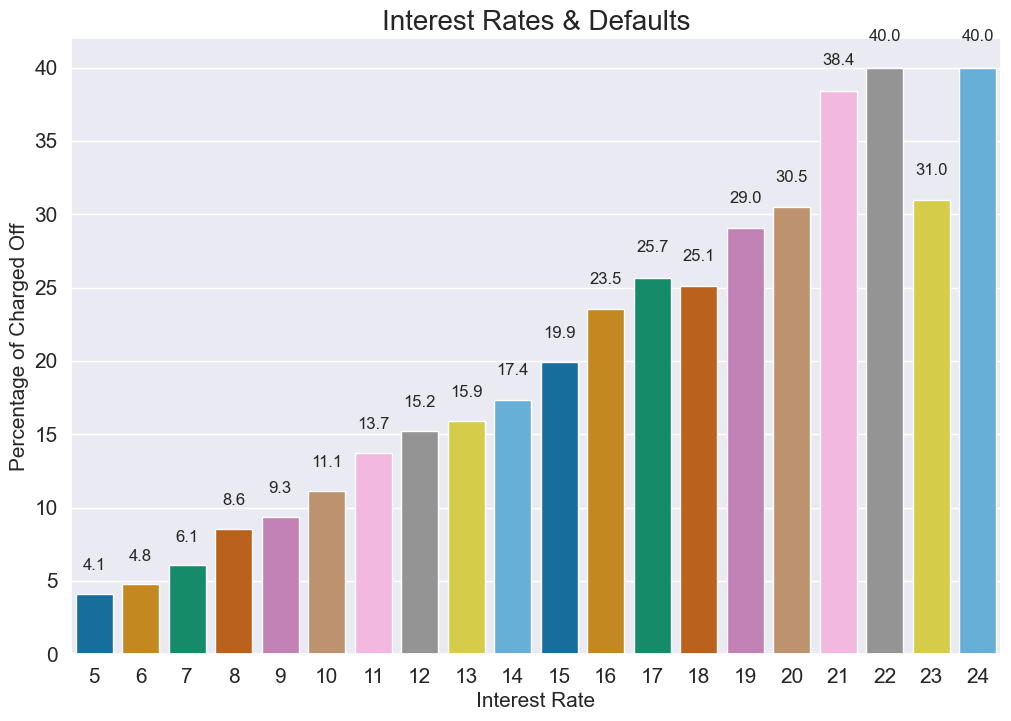

In [63]:
df2['int_rates'] = df2['int_rate'].astype(int)
int_rates = df2.groupby('binary_loan_status')['int_rates'].value_counts(normalize= True).reset_index(name = 'count')
int_rates = pd.crosstab(df2['int_rates'],df2['binary_loan_status']).apply(lambda r: r/r.sum()*100, axis=1).reset_index()
print(int_rates.head(10).rename(columns={0:'Not Charged Off', 1:"Charged Off"}))
plt.figure(figsize=(12,8))
splot = sns.barplot(x = 'int_rates',y=1, data = int_rates,palette='colorblind')

sns.set(font_scale=1)
splot.axes.set_title("Interest Rates & Defaults",fontsize=20)
splot.set_xlabel("X Label",fontsize = 15)
splot.set_ylabel("Y Label",fontsize=15)
splot.tick_params(labelsize=15)

splot.set(xlabel='Interest Rate', ylabel='Percentage of Charged Off')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()*1.005), ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')


#### Here we can see as interest rate increases percentage of charged off increases

### Lets see if derogatory public record has affect on default and interest rate given to them

In [64]:
df2['pub_rec'].value_counts(normalize = True)

pub_rec
0    0.946723
1    0.051766
2    0.001284
3    0.000176
4    0.000050
Name: proportion, dtype: float64

#### Here we see 95% of people dont have bad record but whosoever has 1 or above derogatory record let's see how they affect loan default percentage

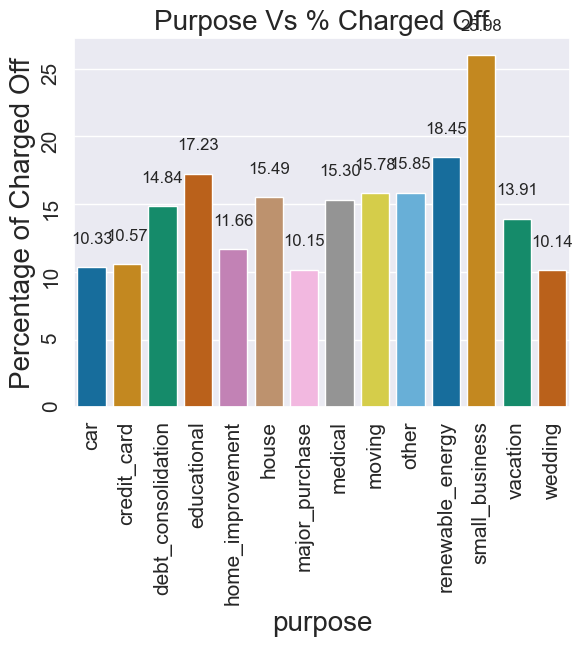

In [65]:
pub_rec = pd.crosstab(df2['purpose'],df2['loan_status']).apply(lambda r: r/r.sum()*100, axis=1).reset_index()
#print(pub_rec)

splot = sns.barplot(x = 'purpose',y='Charged Off', data = pub_rec,palette='colorblind')

sns.set(font_scale=1)
splot.set_xlabel("X Label",fontsize = 20)
splot.set_ylabel("Y Label",fontsize=20)
splot.tick_params(labelsize=15, rotation=90)




sns.set(rc={'figure.figsize':(10,9)})
splot.set(xlabel='purpose', ylabel='Percentage of Charged Off')
plt.title("Purpose Vs % Charged Off", fontsize=20)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()*1.005), ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points')
    

#### Major loan purpose of majority of defaulters is small business

#### Lets explore the main column 'Loan Status'

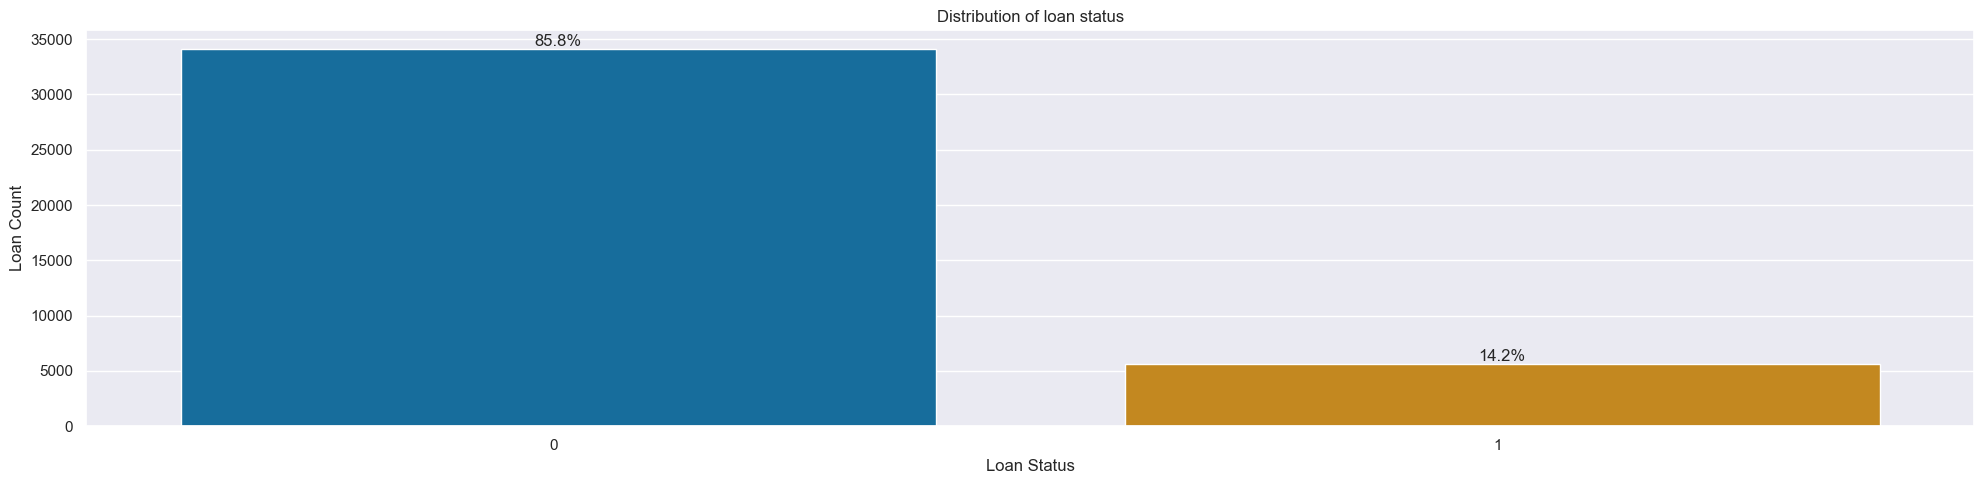

In [66]:

# Count the values and sort them in descending order
sorted_purpose = df2['binary_loan_status'].value_counts().index

# Plot the bar chart
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='binary_loan_status', data=df2, palette='colorblind', order=sorted_purpose)

# Calculate the total number of entries and percentages
total = len(df2)
for p in ax.patches:
    height = p.get_height()  # Get the height of each bar
    percentage = (height / total) * 100  # Calculate the percentage
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

# Add title and labels
plt.title('Distribution of loan status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Count')

# Set x-ticks to show labels
plt.xticks(rotation=0, ha='right') 

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


#### We will analyse Loan distribution across states, let's see which state has highest loan charged off or ongoing loans

In [67]:
addr_state = df2['addr_state'].value_counts().reset_index(name = "Count").rename(columns={'index':"State"})
print(addr_state.head())
print("")
print(addr_state.tail())

  addr_state  Count
0         CA   7099
1         NY   3812
2         FL   2866
3         TX   2727
4         NJ   1850

   addr_state  Count
45         IN      9
46         ID      6
47         IA      5
48         NE      5
49         ME      3


#### There are few states with very less loan accounts, lets dig deeper and check distribution of loan status among them. We need to find which state has highest charge off¶

In [68]:
state_loanstatus = pd.crosstab(df2['addr_state'], df2['binary_loan_status']).apply(lambda r: r/r.sum(), axis=1)
state_loanstatus = pd.merge(addr_state,state_loanstatus, right_on = 'addr_state', left_on = 'addr_state')
print(state_loanstatus)

   addr_state  Count         0         1
0          CA   7099  0.841527  0.158473
1          NY   3812  0.870147  0.129853
2          FL   2866  0.824145  0.175855
3          TX   2727  0.884122  0.115878
4          NJ   1850  0.849730  0.150270
5          IL   1525  0.870820  0.129180
6          PA   1517  0.881345  0.118655
7          VA   1407  0.874200  0.125800
8          GA   1398  0.846209  0.153791
9          MA   1340  0.881343  0.118657
10         OH   1223  0.873262  0.126738
11         MD   1049  0.845567  0.154433
12         AZ    879  0.860068  0.139932
13         WA    840  0.848810  0.151190
14         CO    792  0.876263  0.123737
15         NC    788  0.855330  0.144670
16         CT    751  0.874834  0.125166
17         MI    720  0.856944  0.143056
18         MO    686  0.833819  0.166181
19         MN    615  0.868293  0.131707
20         NV    497  0.782696  0.217304
21         SC    472  0.860169  0.139831
22         WI    460  0.863043  0.136957
23         AL   

#### Dividing states into groups on the basis of their number of loan accounts and taking top 5 risky states within the top bin

In [69]:
bin_labels = ['2-82','83-251', '252-544','545-1245','1246-8000']
state_loanstatus['count_state_bins'], bin_edges = pd.qcut(state_loanstatus.Count,  q=[0, .2, .4, .6, .8, 1],labels = bin_labels , precision =1, retbins = True )
state_loanstatus=state_loanstatus.rename(columns={0:'Not Charged Off',1:'Charged Off'})
st_top=state_loanstatus[state_loanstatus.count_state_bins=="1246-8000"]
print(st_top.nlargest(5,'Charged Off'))

  addr_state  Count  Not Charged Off  Charged Off count_state_bins
2         FL   2866         0.824145     0.175855        1246-8000
0         CA   7099         0.841527     0.158473        1246-8000
8         GA   1398         0.846209     0.153791        1246-8000
4         NJ   1850         0.849730     0.150270        1246-8000
1         NY   3812         0.870147     0.129853        1246-8000


#### Finding rows with highest charged off rate from each bin

In [70]:
states_max_chargeoff = state_loanstatus[state_loanstatus.groupby('count_state_bins')['Charged Off'].transform(max)==state_loanstatus['Charged Off']]
print(states_max_chargeoff)

   addr_state  Count  Not Charged Off  Charged Off count_state_bins
2          FL   2866         0.824145     0.175855        1246-8000
18         MO    686         0.833819     0.166181         545-1245
20         NV    497         0.782696     0.217304          252-544
35         HI    174         0.839080     0.160920           83-251
48         NE      5         0.400000     0.600000             2-82


#### So these are few states in each category with highest defaults

In [71]:
state_loanstatus['Charged Off'].describe()

count    50.000000
mean      0.137341
std       0.079333
min       0.000000
25%       0.118647
50%       0.130780
75%       0.154272
max       0.600000
Name: Charged Off, dtype: float64

#### We can see median of 13.13% of loans are charged off across the country which isnt very different from the mean suggesting less skew

#### Lets see how Annual Income affect Loan repayment status 

In [72]:
df2['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### We can see huge variation in annual income ranging from USD 3971 to USD 6000000. We can group them into categories like low income group or high income group.

In [73]:
bin_labels= ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

df2['annual_inc_bins'],bin_edges = pd.qcut(df2['annual_inc'],  q=[0, .2, .4, .6, .8, 1] ,labels = bin_labels , precision =1, retbins = True )
results = df2['annual_inc_bins'].unique()
print(df2[['annual_inc','annual_inc_bins']].head())

   annual_inc annual_inc_bins
0     24000.0          Bronze
1     30000.0          Bronze
2     12252.0          Bronze
3     49200.0          Silver
4     80000.0        Platinum


In [74]:
print(bin_edges)

[4.00000e+03 3.75000e+04 5.04000e+04 6.58444e+04 9.00000e+04 6.00000e+06]


#### We can see the threshold of each Category is
    1. Bronze - 4,000-37,500
    2. Silver - 37,501-50,400
    3. Gold - 50,401-65,844
    4. Platinum - 65,845-90,000 
    5. Diamond - 90001- 6000000

#### Distribution of funded amount across income bins, e.g., Bronze - min, median, mean, max


Text(0, 0.5, 'Funded Amount')

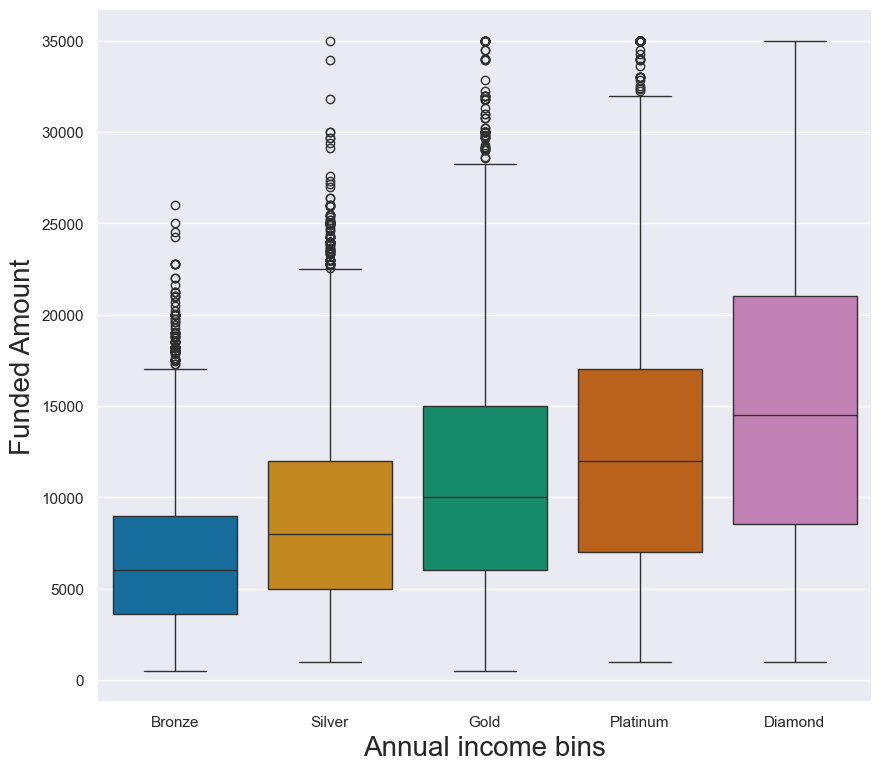

In [75]:
df2.groupby(['annual_inc_bins'])['funded_amnt'].describe().round(2).reset_index()
sns.boxplot(x = df2['annual_inc_bins'], 
            y = df2['funded_amnt'],palette='colorblind')
plt.xlabel("Annual income bins",fontsize = 20)
plt.ylabel("Funded Amount",fontsize=20)


#### Funds amounts are proportionally more based on their annual income

In [76]:
inc_loanstatus = pd.crosstab(df2['annual_inc_bins'], df2['binary_loan_status']).apply(lambda r: r/r.sum(), axis=1).reset_index().rename(columns={0:'Not Charged Off',1:'Charged Off'}).sort_values('Charged Off', ascending = False)
print(inc_loanstatus)

binary_loan_status annual_inc_bins  Not Charged Off  Charged Off
0                           Bronze         0.821308     0.178692
1                           Silver         0.846125     0.153875
2                             Gold         0.855855     0.144145
3                         Platinum         0.874447     0.125553
4                          Diamond         0.894520     0.105480


#### Here we can see the charged off is decreasing as income category is increasing, there is difference of almost 10% in Diamond and Bronze category

Text(0, 0.5, '% Charge Off')

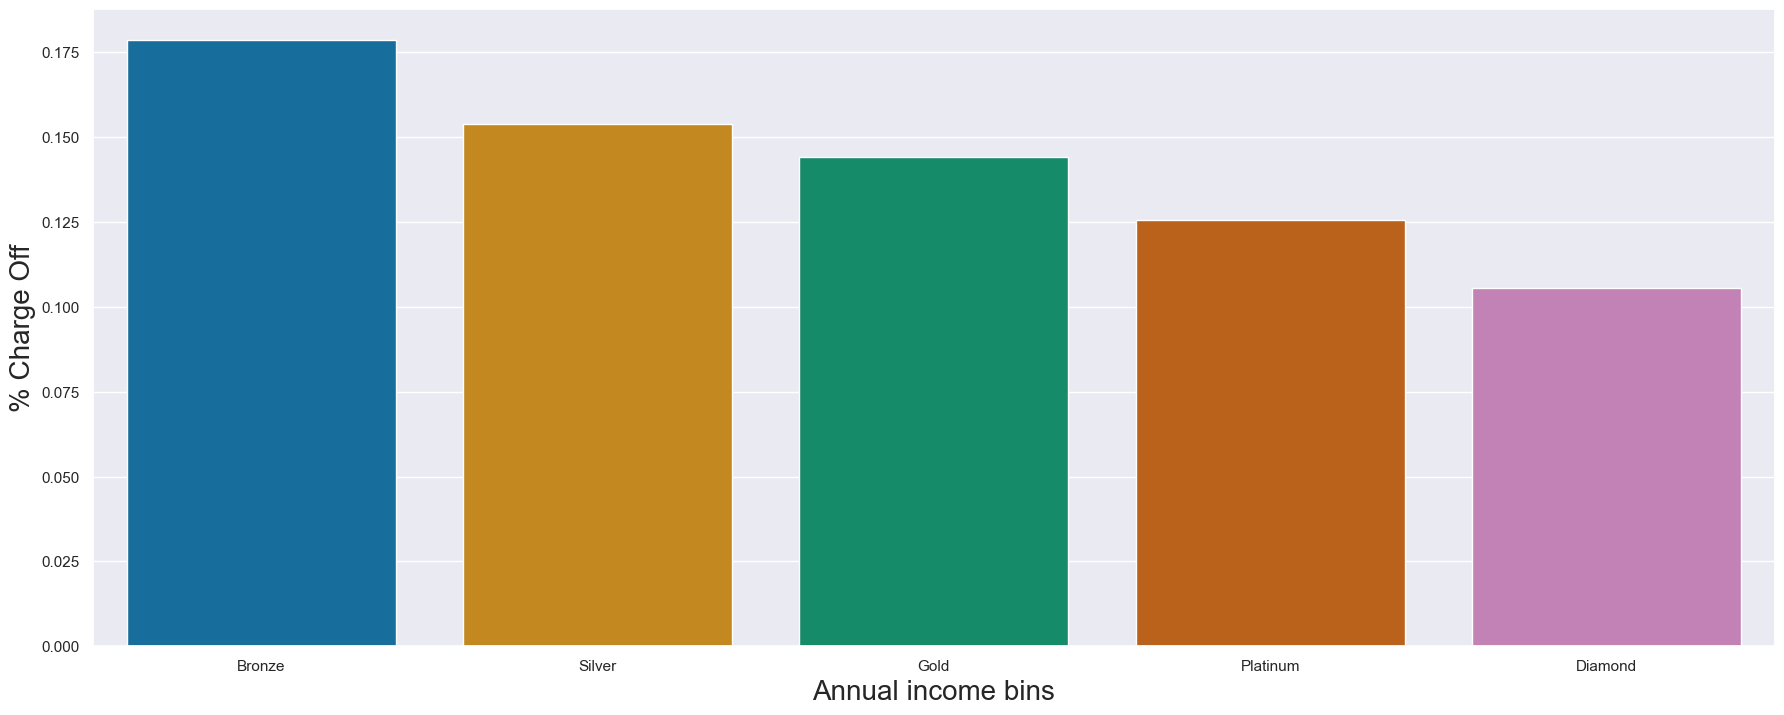

In [77]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.barplot(x = 'annual_inc_bins', y = 'Charged Off',data=inc_loanstatus,
            palette='colorblind')
plt.xlabel("Annual income bins",fontsize = 20)
plt.ylabel("% Charge Off",fontsize=20)

#### Low salary income slab applicants are taking defaults compared to upper bracket annual salary loan applicants

#### Analysing earliest credit line to check if younger ones are more likely to default

In [78]:
df2['earliest_cr_line'].describe()

count                            39717
mean     1997-04-11 16:09:21.250849664
min                1969-02-01 00:00:00
25%                1993-12-01 00:00:00
50%                1998-05-01 00:00:00
75%                2001-09-01 00:00:00
max                2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [79]:
# extracting year from 'earliest_cr_line'

df2['earliest_cr_line_year']= df2['earliest_cr_line'].dt.year

In [80]:
df2 = df2[df2['earliest_cr_line_year']<2010]

In [81]:
df2['earliest_cr_line_bins'], bin_edges = pd.qcut(df2['earliest_cr_line_year'],q=[0, .2, .4, .6, .8, 1]  , precision =1, retbins = True )

In [82]:
credit_line_bins_crosstab = pd.crosstab(df2['earliest_cr_line_bins'], df2['binary_loan_status']).apply(lambda r: r/r.sum(), axis=1).reset_index().rename(columns={0:'Not Charged Off',1:'Charged Off'}).sort_values('Charged Off', ascending = False)
print(credit_line_bins_crosstab)

binary_loan_status earliest_cr_line_bins  Not Charged Off  Charged Off
4                       (2002.0, 2008.0]         0.847692     0.152308
2                       (1996.0, 1999.0]         0.851239     0.148761
3                       (1999.0, 2002.0]         0.855677     0.144323
1                       (1992.0, 1996.0]         0.865411     0.134589
0                       (1968.9, 1992.0]         0.870242     0.129758


#### Here we can see there is slight increase of 2% from first category to last category

#### We will see how length of employment affects the status of loan

In [83]:
print(df2.emp_length.unique())
print('Number of NA values are {}'.format(df2.emp_length.isnull().sum()))
df2['emp_length'] = df2['emp_length'].replace({'N/A': None, ' year': '', ' years': '', r'\D+': ''}, regex=True).astype(float)
print(df2.emp_length)

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
Number of NA values are 1046
0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
5         3.0
6         8.0
7         9.0
8         4.0
9         1.0
10        5.0
11       10.0
12        1.0
13        3.0
14        3.0
15        1.0
16        4.0
17       10.0
18        1.0
19        6.0
20        3.0
21       10.0
22       10.0
23        5.0
24        1.0
25        2.0
26        9.0
27        2.0
28       10.0
29        1.0
30        7.0
31        5.0
32        2.0
33        2.0
34        7.0
35       10.0
36        2.0
37        1.0
38        1.0
39        1.0
40        4.0
41       10.0
42        9.0
43       10.0
44       10.0
45        6.0
46       10.0
47        6.0
48       10.0
49        5.0
50        8.0
51        9.0
52        1.0
53        4.0
54        1.0
55        7.0
56        7.0
57        1.0
58        2.0
59        1.0
60        1.

#### Here we will assign the years of service to some category like Senior, Mid Level or Fresher

In [84]:
df2['emp_exp']=np.where(df2.emp_length>6,'Senior',np.where(df2.emp_length>2,'Mid Level', np.where(df2.emp_length<3,'Fresher','Nan')))
print(df2['emp_exp'].value_counts(normalize=True))

emp_exp
Senior       0.337295
Mid Level    0.328690
Fresher      0.307619
Nan          0.026396
Name: proportion, dtype: float64


In [85]:
exp_bins_crosstab = pd.crosstab(df2['emp_exp'], df2['binary_loan_status']).apply(lambda r: r/r.sum(), axis=1).reset_index().rename(columns={0:'Not Charged Off',1:'Charged Off'}).sort_values('Charged Off', ascending = False)
print(exp_bins_crosstab)

binary_loan_status    emp_exp  Not Charged Off  Charged Off
2                         Nan         0.787763     0.212237
3                      Senior         0.854033     0.145967
1                   Mid Level         0.863340     0.136660
0                     Fresher         0.863987     0.136013


In [86]:
#Default Percentages AT THE ROW LEVEL

#df_wna.pivot_table(index = ['emp_exp', 'annual_inc_bins'], columns = 'binary_loan_status', values='count').apply(lambda r: r/r.sum(), axis=1)
a = df2.groupby(['emp_exp','annual_inc_bins'])['binary_loan_status'].value_counts().reset_index(name = 'count')
a.pivot_table(index = ['annual_inc_bins','emp_exp'], columns = 'binary_loan_status', values='count').apply(lambda r: r/r.sum(), axis=1)

binary_loan_status                0         1
annual_inc_bins emp_exp                      
Bronze          Fresher    0.825871  0.174129
                Mid Level  0.834866  0.165134
                Nan        0.771318  0.228682
                Senior     0.804965  0.195035
Silver          Fresher    0.857468  0.142532
                Mid Level  0.853087  0.146913
                Nan        0.744076  0.255924
                Senior     0.833623  0.166377
Gold            Fresher    0.870183  0.129817
                Mid Level  0.866615  0.133385
                Nan        0.841060  0.158940
                Senior     0.837138  0.162862
Platinum        Fresher    0.893836  0.106164
                Mid Level  0.874811  0.125189
                Nan        0.817308  0.182692
                Senior     0.863911  0.136089
Diamond         Fresher    0.902145  0.097855
                Mid Level  0.890685  0.109315
                Nan        0.890625  0.109375
                Senior     0.893098  0.106902

In [87]:
pd.crosstab(df2['emp_exp'], df2['binary_loan_status']).apply(lambda r: r/r.sum(), axis=1).rename(columns={0:'Not Charged Off',1:'Charged Off'}).sort_values('Charged Off', ascending=False)

binary_loan_status,Not Charged Off,Charged Off
emp_exp,,
Nan,0.787763,0.212237
Senior,0.854033,0.145967
Mid Level,0.863340,0.136660
Fresher,0.863987,0.136013


#### Not much of a variation by years of experience

#### We will analyse effect of debt to income ratio on Status of loan, lets see if high DTI leads to more charge off

In [88]:
print(df2['dti'].describe())

count    39627.000000
mean        13.313383
std          6.676633
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


#### Lets see distribution of debt to income ratio in Loan Status and Annual income categories

In [89]:
dti_analysis = df2.groupby(['annual_inc_bins','binary_loan_status'])['dti'].median().reset_index()
dti_analysis = dti_analysis.pivot(index='annual_inc_bins', columns='binary_loan_status', values='dti').rename(columns={0:'Not Charged Off',1:'Charged Off'}).sort_values('Charged Off', ascending = False)
print(dti_analysis)


binary_loan_status  Not Charged Off  Charged Off
annual_inc_bins                                 
Silver                        14.15        15.04
Gold                          14.02        14.99
Platinum                      13.34        14.19
Bronze                        13.88        14.05
Diamond                       11.15        12.87


### We will put DTI into three categories and find out if there is any significant increase in charged off among three categories

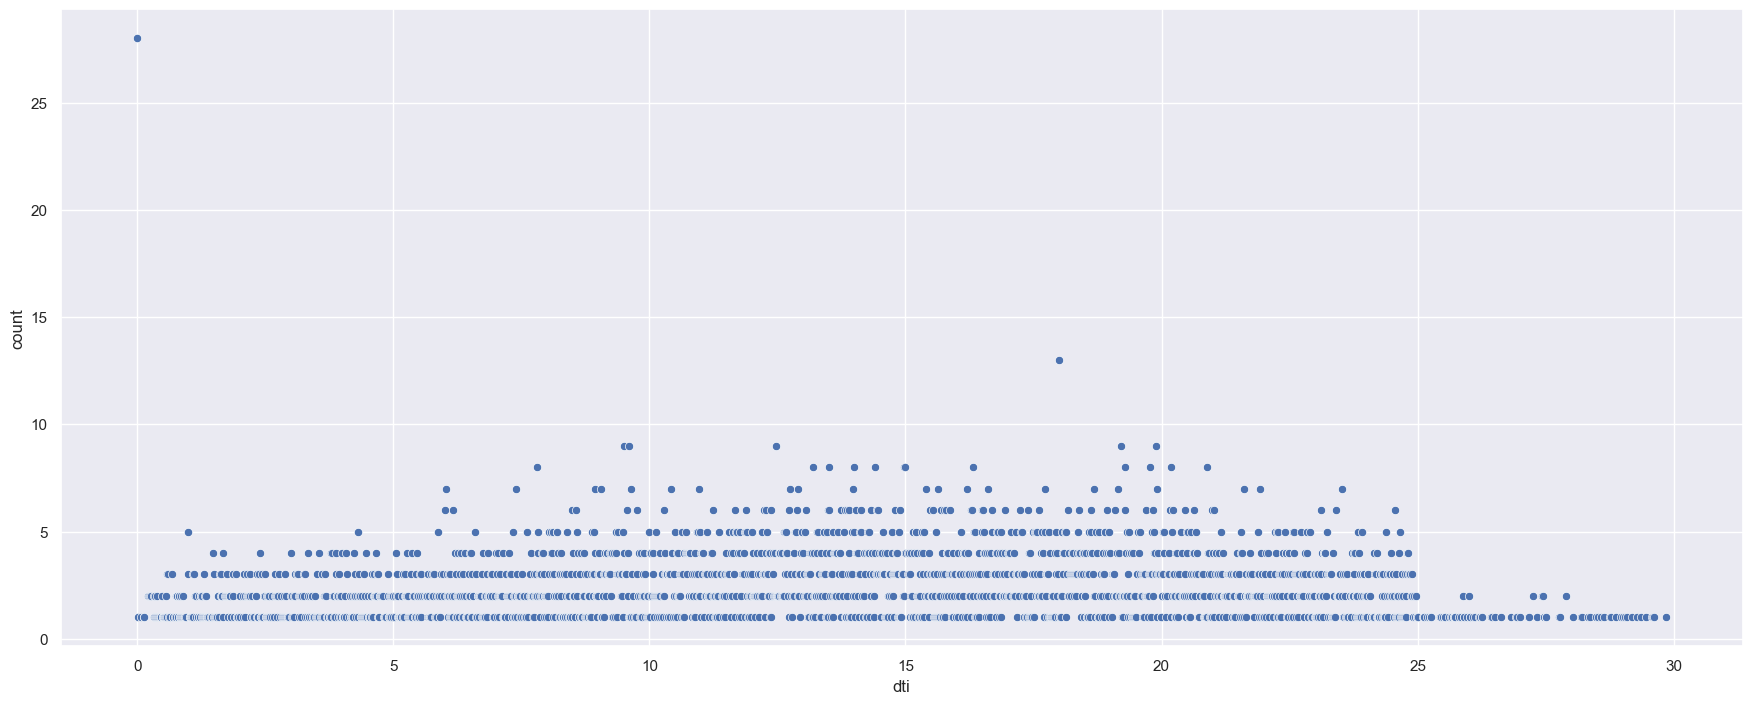

In [90]:
#Please check the bivariate relationship between dti and mean charged off values

a = df2.loc[df2['binary_loan_status'] == 1].groupby(['dti'])['binary_loan_status'].value_counts().reset_index(name='count')
sns.scatterplot(x=a['dti'], y=a['count'])
a_sorted = a.sort_values('count', ascending=False)

In [91]:
bins_labels = ['0-7', '8-14', '15-21', '22-30']
df2['dti_bins'], thresh= pd.cut(df2['dti'],[0,5,10,15,20],labels = bins_labels  , precision =1, retbins = 1)
thresh = pd.DataFrame(zip(thresh,bins_labels))
ab=pd.crosstab(df2['dti_bins'], df2['binary_loan_status']).apply(lambda r: r/r.sum(), axis=1)
ab

binary_loan_status,0,1
dti_bins,,
0-7,0.879807,0.120193
8-14,0.875558,0.124442
15-21,0.858257,0.141743
22-30,0.847222,0.152778


binary_loan_status dti_bins  Not Charged Off  Charged Off
3                     22-30         0.847222     0.152778
2                     15-21         0.858257     0.141743
1                      8-14         0.875558     0.124442
0                       0-7         0.879807     0.120193


Text(0, 0.5, '% Charge Off')

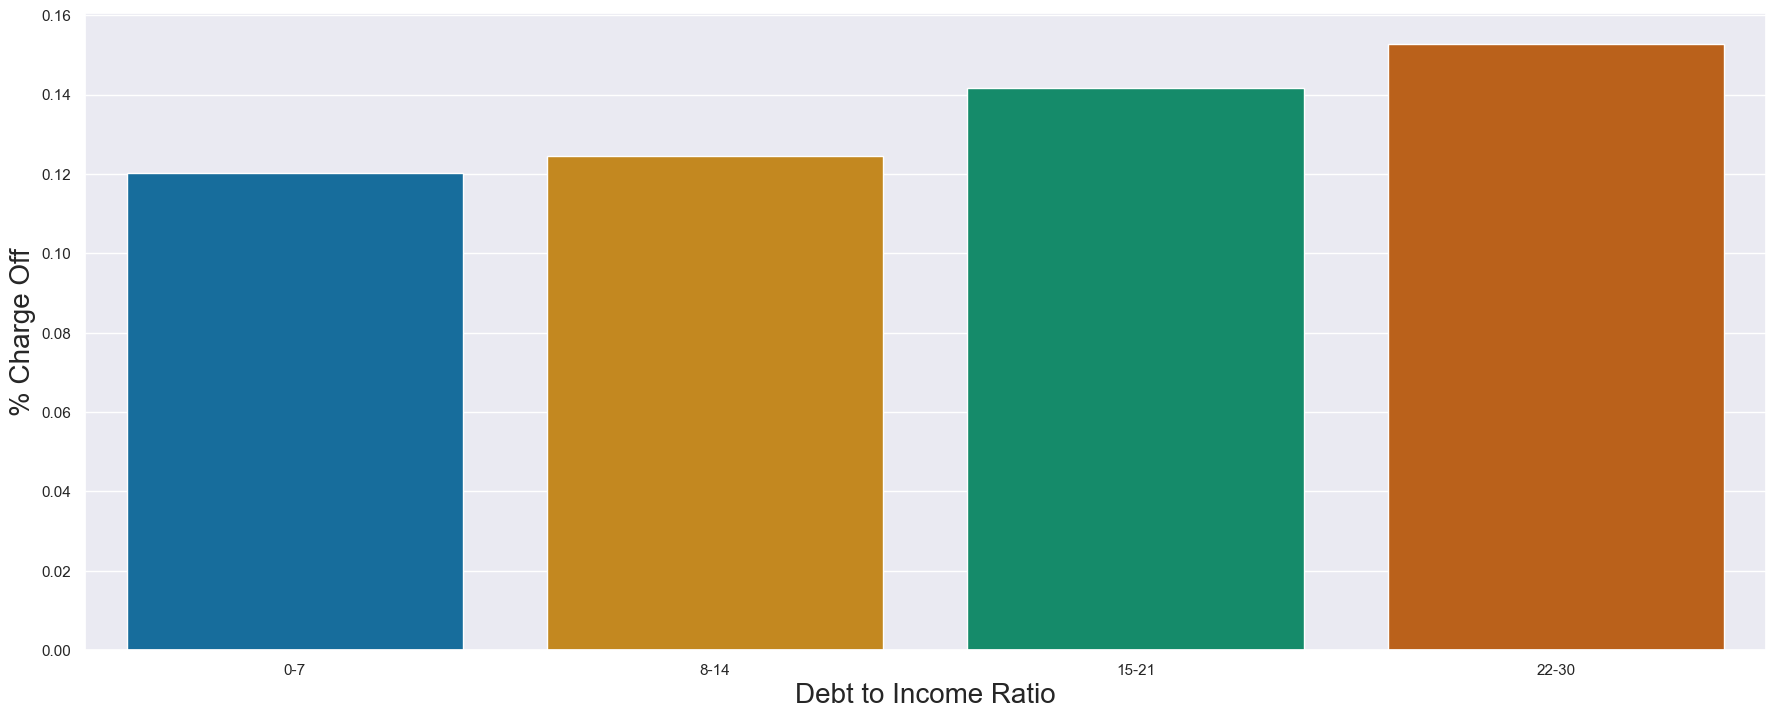

In [92]:
dti = pd.crosstab(df2['dti_bins'], df2['binary_loan_status']).apply(lambda r: r/r.sum(), axis=1).reset_index().rename(columns={0:'Not Charged Off',1:'Charged Off'}).sort_values('Charged Off', ascending = False)
print(dti)

sns.barplot(x = 'dti_bins', y = 'Charged Off',data=dti,palette='colorblind')
plt.xlabel("Debt to Income Ratio",fontsize = 20)
plt.ylabel("% Charge Off",fontsize=20)

#### As DTI increases, default rate increases too, the highest DTI bin has around ~3.2% higher default rate compared to the lowest DTI bin

In [93]:
pd.crosstab(df2['annual_inc_bins'], df2['dti_bins']).apply(lambda r: r/r.sum(), axis=1)

dti_bins,0-7,8-14,15-21,22-30
annual_inc_bins,,,,
Bronze,0.172837,0.242628,0.295216,0.289318
Silver,0.152280,0.225081,0.314658,0.307980
Gold,0.128193,0.236627,0.317590,0.317590
Platinum,0.142408,0.247679,0.323300,0.286613
Diamond,0.179821,0.303119,0.293894,0.223166


#### Here also we see a trend of High DTI among different annual income categories, there is 8.87% increase in High DTI when income decreases from highest to lowest category

Text(0, 0.5, 'Interest Rates')

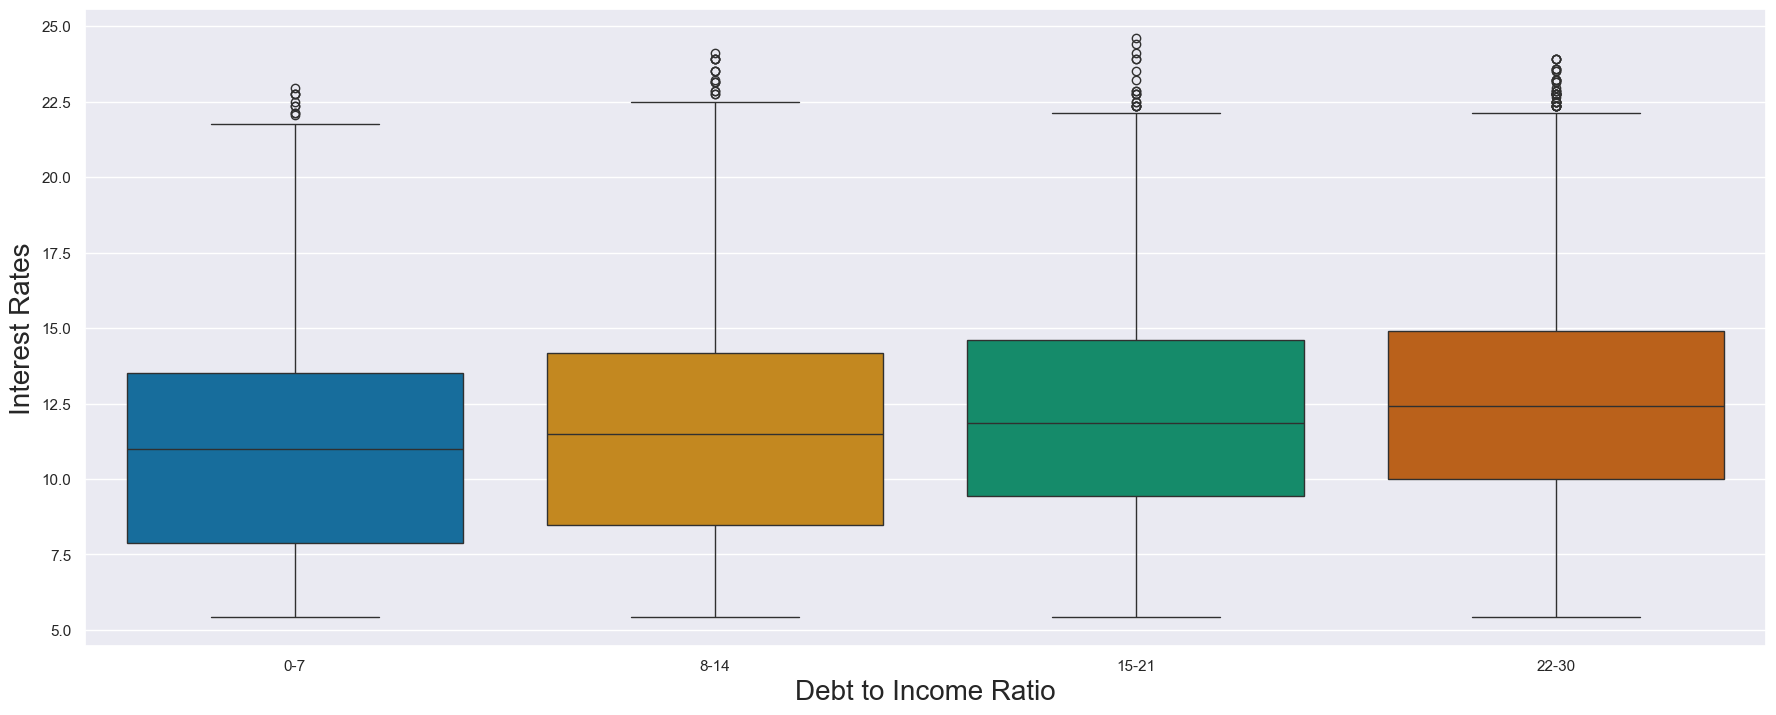

In [94]:
sns.boxplot(x='dti_bins', y='int_rate', data=df2, palette='colorblind')
plt.xlabel("Debt to Income Ratio",fontsize = 20)
plt.ylabel("Interest Rates",fontsize=20)

### Here we can see there is slight increase in median of interest rate as debt to income ratio increases

### Lets explore deliquency column, we will analyse it with other variables like annual income and loan status

In [95]:
print(df2['delinq_2yrs'].describe())

count    39627.000000
mean         0.146668
std          0.491988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


In [96]:
# Count of delinquency with loan status

In [97]:
delinq_analysis = df2.loc[(df2['delinq_2yrs']>0) ].groupby('binary_loan_status')['delinq_2yrs'].value_counts().reset_index(name='count')
delinq_analysis.columns = ['Loan Status', 'Delinq 2yrs', 'Count']
delinq_analysis.pivot(index = 'Delinq 2yrs', columns = 'Loan Status', values='Count').rename(columns={0:'Not Charged Off',1:'Charged Off'})


Loan Status,Not Charged Off,Charged Off
Delinq 2yrs,,
1,2794.0,507.0
2,556.0,130.0
3,184.0,35.0
4,49.0,13.0
5,19.0,3.0
6,9.0,1.0
7,3.0,1.0
8,1.0,1.0
9,1.0,NaN


In [98]:
delinq_analysis = df2.loc[(df2['delinq_2yrs']>0) ].groupby(['annual_inc_bins', 'binary_loan_status'])['delinq_2yrs'].value_counts().reset_index(name='count')
delinq_analysis.columns = ['Annual Income Categories', 'Loan Status', 'Delinq 2yrs', 'Count']
print(delinq_analysis.pivot_table(index = 'Loan Status', columns = 'Annual Income Categories', values='Count').apply(lambda r: r/r.sum(), axis=1))


Annual Income Categories    Bronze    Silver      Gold  Platinum   Diamond
Loan Status                                                               
0                         0.169754  0.176389  0.192148  0.219519  0.242190
1                         0.238784  0.195369  0.215630  0.173661  0.176556


#### Here we see Silver category has highest percentage of charged off loans

### We will split numeric and categorical columns and find their association with loan status

In [99]:
numerical_cols = df2._get_numeric_data().columns.to_list()
numerical_cols

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'pub_rec_bankruptcies',
 'binary_loan_status',
 'int_rates',
 'earliest_cr_line_year']

In [100]:
nu_cols =df2[numerical_cols]

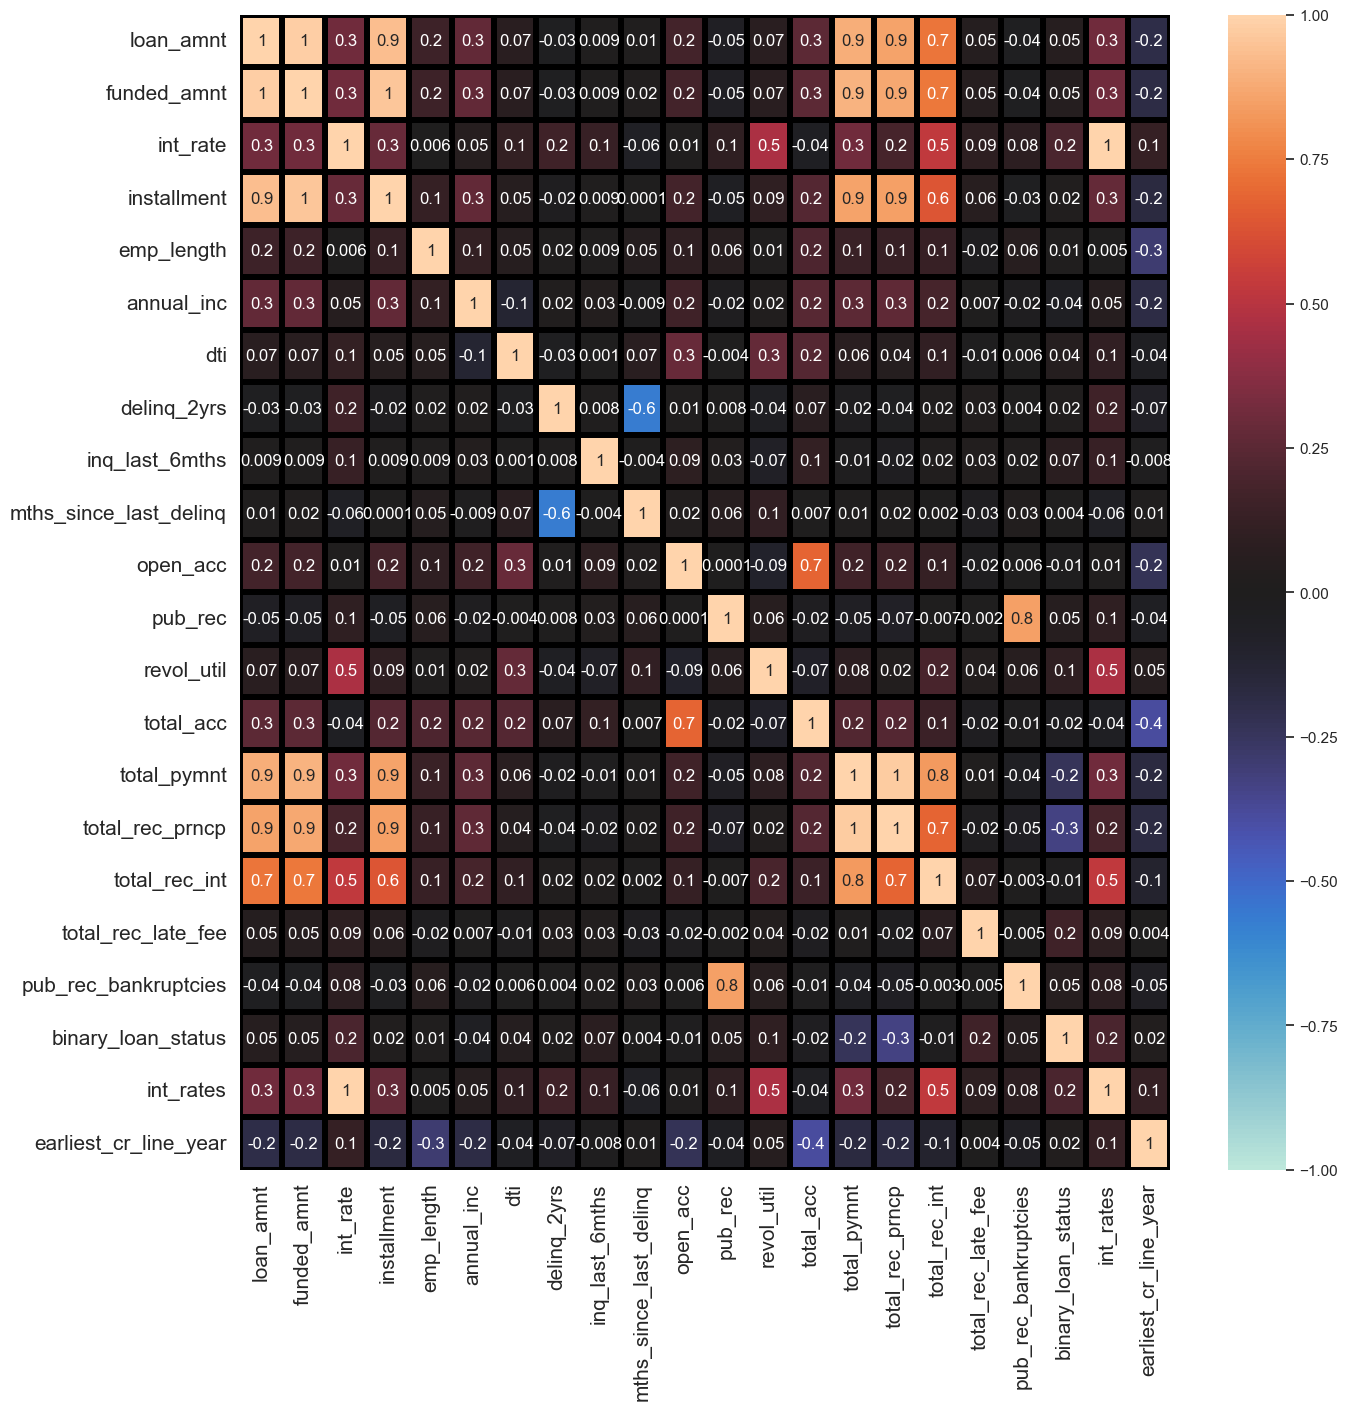

In [101]:
plt.figure(figsize=(15,15))
splot = sns.heatmap(nu_cols.corr(), annot = True, fmt = '.1g',vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black')
sns.set(font_scale=1)
splot.tick_params(labelsize=15)


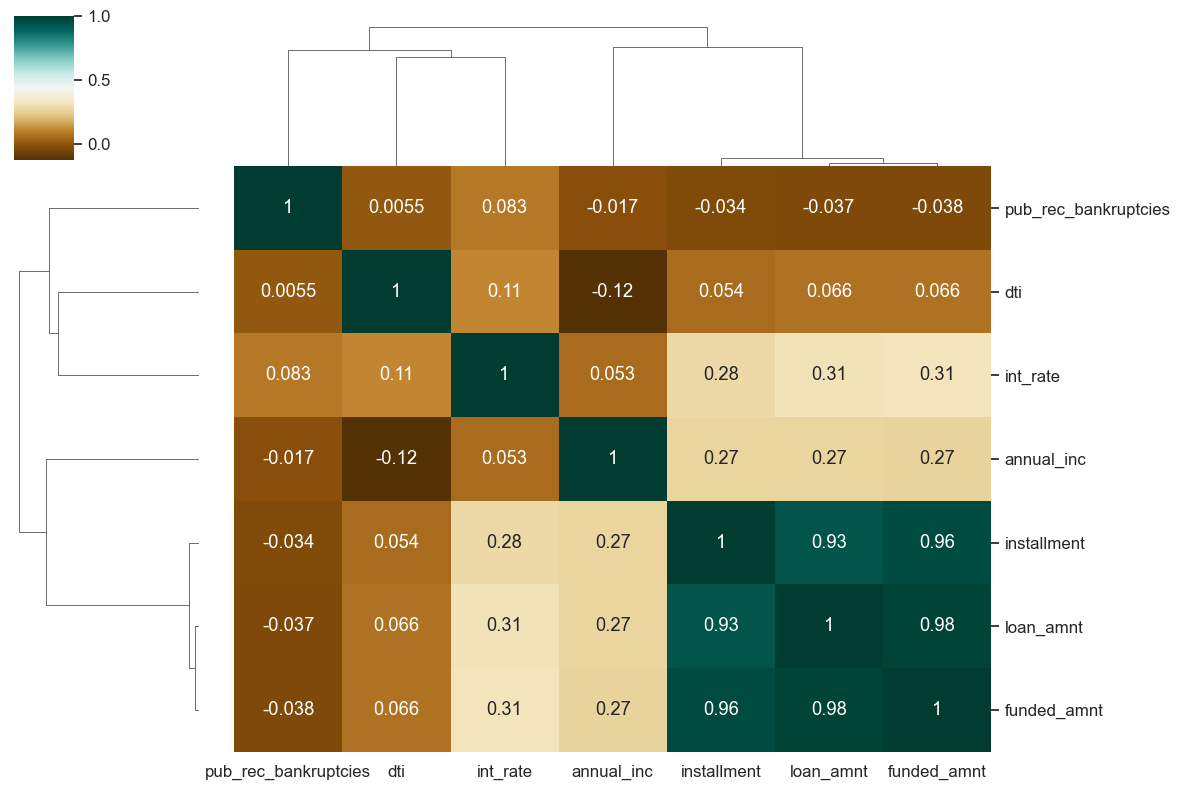

In [102]:
df_correlation = df2[['installment','loan_amnt', 'funded_amnt', 'pub_rec_bankruptcies','annual_inc','dti', 'int_rate']]
loan_correlation = df_correlation.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

### Distribution of Annual Income Over Loan Amount

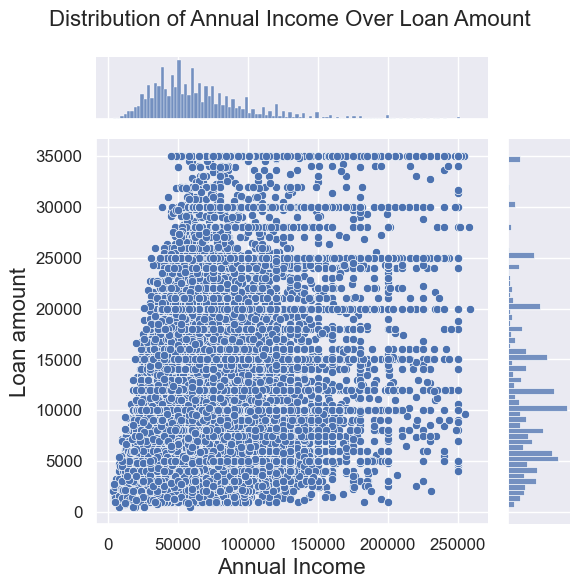

In [103]:
g=sns.jointplot(x = 'annual_inc', y = 'loan_amnt', data=df2.loc[df2['annual_inc']<260000],palette='colorblind')
g.set_axis_labels('Annual Income', 'Loan amount', fontsize=16)
g.fig.suptitle('Distribution of Annual Income Over Loan Amount', fontsize=16)
g.fig.tight_layout()
plt.show()


### Creating bins of revol util and plotting it against % of charge off

In [104]:
df2['revol_util_bin'] = round(df2['revol_util']/5)

In [105]:
## Function to show labels in bar plots
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

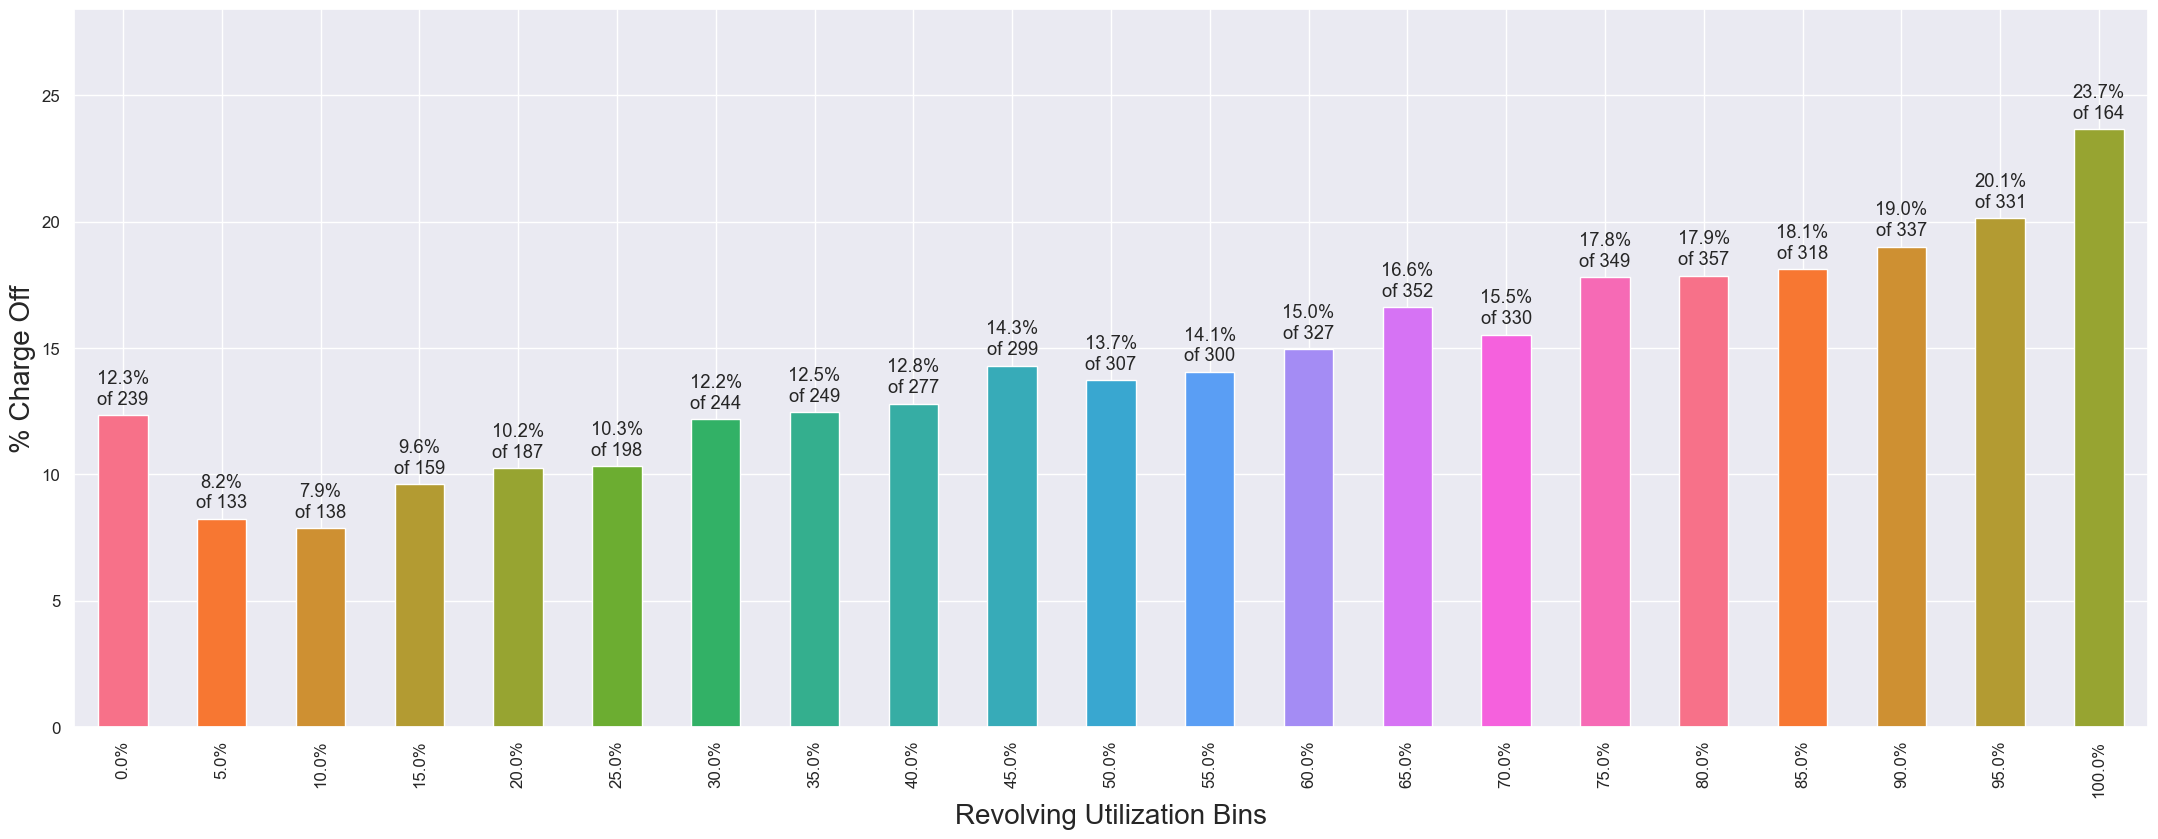

In [106]:

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    
    percentages = grp.unstack() * 100 / cnt.T
    
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax
ax = plotLoanStatus(df2, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.ylabel("% Charge Off",fontsize = 20)
plt.xlabel("Revolving Utilization Bins",fontsize=20)
plt.show()

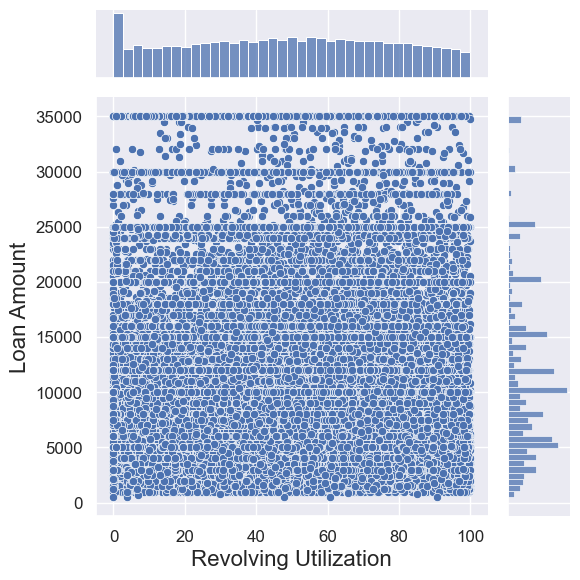

In [107]:
g = sns.jointplot(x='revol_util', y='loan_amnt', data=df2)
g.set_axis_labels('Revolving Utilization', 'Loan Amount', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

### Distribution of Loan Amount Over Debt to Income Ratio'

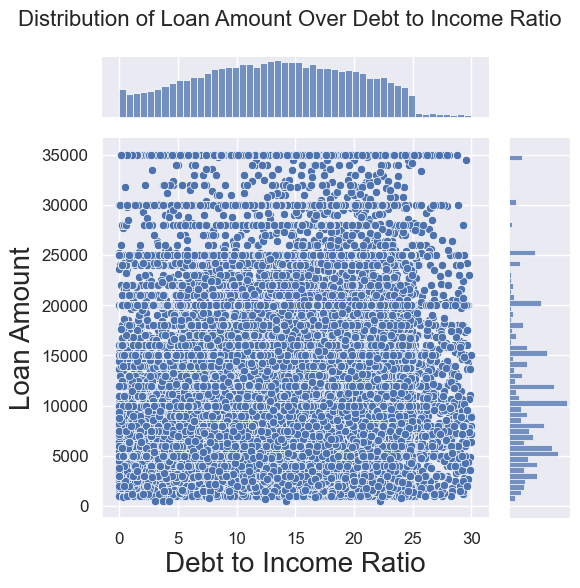

In [108]:
g=sns.jointplot(x = 'dti', y ='loan_amnt', data=df2,palette='colorblind')
plt.xlabel("Debt to Income Ratio",fontsize = 20)
plt.ylabel("Loan Amount",fontsize=20)
g.fig.suptitle('Distribution of Loan Amount Over Debt to Income Ratio', fontsize=16)
g.fig.tight_layout()
plt.show()

### Distribution of Interest Rate over Debt to Income Ratio

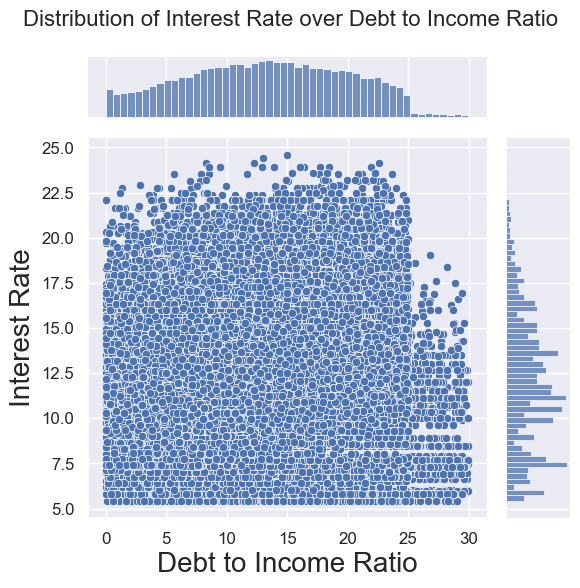

In [109]:
g=sns.jointplot(x ='dti' , y = 'int_rate', data=df2,palette='colorblind')
plt.xlabel("Debt to Income Ratio",fontsize = 20)
plt.ylabel("Interest Rate",fontsize=20)
g.fig.suptitle('Distribution of Interest Rate over Debt to Income Ratio', fontsize=16)
g.fig.tight_layout()
plt.show()